#<font color='sky blue'>Predicting Bankruptcy

###<font color='sky blue'>1. Domain Introduction

### What is Bankruptcy??


Bankruptcy is a legal status of a person or entity that cannot pay debts to creditors. In most jurisdictions,
bankruptcy is imposed by a court order.

### <font color = 'sky blue'>2. Problem Statement

We need to find the best model inorder to predict whether the entity is likely to get bankrupted or not. By analysing various features we can come to some conclusion for the reason why entities are landing into bankruptcy.

### <font color="sky blue">3. Data Description</font>

The dataset is about bankruptcy prediction of Polish Companies. The data was collected from Emerging Market Information Services(EMIS), which is a Database containing information on emerging markets around the world. The bankrupt companies were analyzed in the year 2010-2012, while the still operating companies were evaluated from 2007-2013.

In [0]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("train.csv")


In [0]:
# Read the train dataset
pd.set_option("display.max_columns",70)
df.head() 

ID     Attr1    Attr2    Attr3   Attr4     Attr5    Attr6     Attr7  \
0   1  0.135370  0.45185  0.31162  2.0469   10.2340  0.16768  0.167630   
1   2  0.005861  0.39858  0.19768  1.9390    9.5771  0.00000  0.007237   
2   3  0.110600  0.16117  0.47894  7.5711  263.9000  0.00000  0.138360   
3   4  0.063911  1.40730 -0.29595  0.5291  -46.2870 -0.71420  0.079071   
4   5  0.131680  0.66031  0.44121  2.7098  -23.5960 -0.20007  0.131910   

     Attr8    Attr9   Attr10    Attr11   Attr12    Attr13    Attr14   Attr15  \
0  1.21310  2.25540  0.54815  0.183310  0.56316  0.089220  0.167630   819.60   
1  1.50890  0.97880  0.60142  0.029484  0.03438  0.036362  0.007237  4087.60   
2  5.20450  0.68447  0.83883  0.138830  1.89830  0.236220  0.138360   363.85   
3 -0.33076  0.98490 -0.46548  0.079071  0.12581  0.030274  0.079071  5433.40   
4  0.51445  2.13570  0.33969  0.186110  0.51117  0.167100  0.131910   675.35   

     Attr16   Attr17    Attr18    Attr19  Attr20   Attr21    Attr22    Attr23  \
0  0.445340  2.21310  0.167630  0.074325  40.156      NaN  0.181150  0.060019   
1  0.089295  2.50890  0.007237  0.007394  58.670  0.97850  0.006018  0.005988   
2  1.003200  6.20450  0.138360  0.202140  38.625  1.83520  0.116690  0.161590   
3  0.067177  0.71058  0.079071  0.025321  12.470  0.44909  0.137870  0.020466   
4  0.540460  1.51440  0.131910  0.061763  80.288  1.06000  0.182720  0.061656   

     Attr24    Attr25    Attr26     Attr27   Attr28  Attr29   Attr30  \
0  0.167630  0.511480  0.373930   11.55400  0.79756  3.5818  0.15579   
1  0.057817  0.547400  0.085842    0.27052  0.33402  5.6431  0.40721   
2  0.235380  0.834900  0.830940  249.30000  1.06860  4.1045 -0.16288   
3 -0.689290 -0.465480  0.056405    0.43483 -0.44339  4.6625  0.45003   
4  0.208580  0.048201  0.540110    3.37080  1.46710  2.2343  0.30582   

     Attr31   Attr32  Attr33    Attr34   Attr35   Attr36   Attr37   Attr38  \
0  0.079986   52.289  6.9805  4.598500  0.17756  2.25540  3.58820  0.64880   
1  0.007394  107.490  3.6924  1.950100  0.26400  0.97880  1.33380  0.78949   
2  0.202830   46.263  7.8896  3.567900  0.10943  0.68447  5.58440  0.92467   
3  0.025321   72.350  5.0450  0.097967  0.13787  3.50080  0.28998  0.31335   
4  0.079012   49.562  7.3646  2.878100  0.23529  2.13570  0.57046  0.74195   

     Attr39    Attr40    Attr41    Attr42   Attr43   Attr44    Attr45  \
0  0.078728  0.355590  0.070139  0.080316   81.473   41.317  0.545540   
1  0.269720  0.104900  0.386540  0.006149  143.980   85.309  0.037254   
2  0.159870  3.769300  0.038372  0.170480  147.760  109.140  1.527000   
3  0.044150  0.007983  0.301740  0.044150   38.281   25.811  0.599050   
4  0.110170  0.342630  0.053989  0.085555  104.400   24.108  0.280300   

    Attr46  Attr47    Attr48    Attr49   Attr50    Attr51   Attr52   Attr53  \
0  1.21330  43.588  0.147550  0.065421  1.34840  0.297670  0.14326  1.40290   
1  1.19170  73.881 -0.022335 -0.022819  1.02410  0.210510  0.27083  1.01620   
2  6.57730  45.975  0.093362  0.136400  3.42380  0.072886  0.12675  1.87160   
3  0.35935  12.282  0.122400  0.039196  0.23629  0.628480  0.19822 -0.69738   
4  0.88928  90.228 -0.042243 -0.019780  1.05900  0.258050  0.13579  1.12950   

    Attr54     Attr55    Attr56   Attr57   Attr58   Attr59   Attr60   Attr61  \
0  1.66060   1189.700  0.078728  0.24695  0.92586  0.18362   9.0895   8.8342   
1  1.33400      1.939  0.269720  0.00000  0.79303  0.31271   6.2213   4.2785   
2  2.06320   6092.300  0.159870  0.13185  0.80748  0.10234   9.4499   3.3443   
3  0.46946 -13606.000 -0.015327 -0.13730  1.01530 -1.67320  29.2710  14.1410   
4  2.46710     75.681  0.110170  0.38764  0.93881  1.18420   4.5462  15.1400   

   Attr62  Attr63  Attr64  target  
0  48.172  7.5770  5.7725       0  
1  78.499  4.6497  1.6539       0  
2  38.867  9.3910  1.5272       0  
3  73.458  4.9688  4.6785       0  
4  44.101  8.2764  7.1014       0

In [0]:
df.shape

(31283, 66)

### Understanding the Features columns

1. attr1 - net profit / total assets 
2. attr2 - total liabilities / total assets 
3. attr3 - working capital / total assets
4. attr4 - current assets / short-term liabilities
5. attr5 - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
6. attr6 - retained earnings / total assets
7. attr7 - EBIT / total assets
8. attr8 - book value of equity / total liabilities
9. attr9 - sales / total assets
10. attr10 - equity / total assets
11. attr11 - (gross profit + extraordinary items + financial expenses) / total assets
12. attr12 - gross profit / short-term liabilities
13. attr13 - (gross profit + depreciation) / sales
14. attr14 - (gross profit + interest) / total assets
15. attr15 - (total liabilities * 365) / (gross profit + depreciation)
16. attr16 - (gross profit + depreciation) / total liabilities
17. attr17 - total assets / total liabilities
18. attr18 - gross profit / total assets
19. attr19 - gross profit / sales
20. attr20 - (inventory * 365) / sales
21. attr21 - sales (n) / sales (n-1)
22. attr22 - profit on operating activities / total assets
23. attr23 - net profit / sales
24. attr24 - gross profit (in 3 years) / total assets
25. attr25 - (equity - share capital) / total assets
26. attr26 - (net profit + depreciation) / total liabilities
27. attr27 - profit on operating activities / financial expenses
28. attr28 - working capital / fixed assets
29. attr29 - logarithm of total assets
30. attr30 - (total liabilities - cash) / sales
31. attr31 - (gross profit + interest) / sales
32. attr32 - (current liabilities * 365) / cost of products sold
33. attr33 - operating expenses / short-term liabilities
34. attr34 - operating expenses / total liabilities
35. attr35 - profit on sales / total assets
36. attr36 - total sales / total assets
37. attr37 - (current assets - inventories) / long-term liabilities
38. attr38 - constant capital / total assets
39. attr39 - profit on sales / sales
40. attr40 - (current assets - inventory - receivables) / short-term liabilities
41. attr41 - total liabilities / ((profit on operating activities + depreciation) * (12/365))
42. attr42 - profit on operating activities / sales
43. attr43 - rotation receivables + inventory turnover in days
44. attr44 - (receivables * 365) / sales
45. attr45 - net profit / inventory
46. attr46 - (current assets - inventory) / short-term liabilities
47. attr47 - (inventory * 365) / cost of products sold
48. attr48 - EBITDA (profit on operating activities - depreciation) / total assets
49. attr49 - EBITDA (profit on operating activities - depreciation) / sales
50. attr50 - current assets / total liabilities
51. attr51 - short-term liabilities / total assets
52. attr52 - (short-term liabilities * 365) / cost of products sold)
53. attr53 - equity / fixed assets
54. attr54 - constant capital / fixed assets
55. attr55 - working capital
56. attr56 - (sales - cost of products sold) / sales
57. attr57 - (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
58. attr58 - total costs /total sales
59. attr59 - long-term liabilities / equity
60. attr60 - sales / inventory
61. attr61 - sales / receivables
62. attr62 - (short-term liabilities *365) / sales
63. attr63 - sales / short-term liabilities
64. attr64 - sales / fixed assets
65. class - the response variable Y: 0 = did not bankrupt; 1 = bankrupt

### Explanation of Features and Renaming the columns

1. <b>Net Profit</b> - It is the profitability of a venture after accounting for all costs and taxes.

2. <b>Total assets</b> - It is refers to total amount of assets owned by a person or entity.

3. <b>Total libabilities</b> - It is the aggregate debt and financial obligations owned by business to individuals or organizations in a specific period of time.

4. <b>working capital</b> - current assets / current liabilities

5. <b>current assets</b> - It includes cash, cash equivalents, short-term investments(marketable securities), stock inventory, prepaid expenses.

6. <b>short-term liabilities</b> - It is a financial obligation that is to be paid within one year.

7. <b>short-term securities</b> - These are investements that are expected to be sold or converted to cash within one year or company's operating cycle. 

8. <b>receivables</b> - It is the payment which the company will receive from its customers who have purchased its good or services on credit.

9. <b>operating expenses</b> - It is an expenditure that a business incurs as a result of performing its normal business operations.

10. <b>depreciation</b> - It is the reduction in the value of asset over time, mainly due to wear and tear.

11. <b>retained earnings</b> - Retained earnings of a corporation is the accumulated net income of the corporation that is retained by the corporation after a particular amount of time, such as end of the reporting period.

12. <b>EBIT(Earnings before Interest and Tax)</b> - It is a measure of firm's profit that includes all incomes and expenses except interest expenses and income tax expenses.

13. <b>book value of equity</b> - It is a firm's common equity that represents the amount available for distribution to shareholders.

14. <b>sales</b> - sales meet by the company

15. <b>equity</b> - It is the difference between the value of assets and the value of liabilities of something owned.

16. <b>gross profit</b> - It is a company's profit before operating expenses, interest payments and taxes.

17. <b>extraordinary items</b> - These refer to expenses that are infrequent, unusual and significant in size.

18. <b>financial expenses</b> - Interest, income tax and other such expenditure incurred in owning or renting an asset or property.

19. <b>interest</b> - It is the charge or privilege for borrowing money, typically expressed as Annual Percentage Rate(APR).

20. <b>inventory</b> - An inventory of a company should report the cost of its raw materials, work-in-process, and finished goods.

21. <b>profit on operating activities</b> - Activities which include cash receipts from goods sold, payments to employees, taxes, and payments to suppliers.The profit on these activities is called "Profit on Operating activities".

22. <b>rotation receivables</b> - 

23. <b>inventory turnover in days</b> - Inventory turnover is a ratio showing how many times a company has sold and replaced inventory during a given period. A company can then divide the days in the period by the inventory turnover formula to calculate the days to sell the inventory on hand.

24. <b>Cost of products</b> - Cost of products include raw-material, direct labor and overhead.

25. <b>Profit on Sales</b> - Total amount of income a business generates by sale of goods, services etc..

26. <b>Constant Capital</b> - Constant Capital is the value invested in the means of production (MP) and thus embodied in them

27. <b>EBITDA</b> - Earnings before interest, tax, depreciation and ammortization is a measure of company's operating performance.

28. <b>Fixed asset</b> - It is a long-term tangible piece of property that a firm owns and uses in its operations to generate income. Fixed assets are not expected to be consumed or converted to cash within a year.





###Shortcuts:

1. np=net profit
2. tot=total
3. lia=liabilities
4. st=short term
5. op=operating
6. exp=expenses
7. rec=receivables
8. sec=securities
9. expenses=exp
10. dep=depreciation
11. eo=extra ordinary
12. gp=gross profit
13. acts=activities
14. cp=cost of products sold
15. inv=inventories


#Renaming the Columns

In [0]:
df.columns=['ID','np / tot assets', 
'tot lia / tot assets',
'working capital / tot assets',
'current assets / st lia',
'[(cash + st sec + rec - st lia) / (op exp - dep)] * 365',
'retained earnings / tot assets',
'EBIT / total assets',
'book value of equity /tot lia',
'sales / tot assets',
'equity / tot assets',

'(gp + eo items + fin exp) / tot assets',
'gp / st lia',
'(gp + dep) / sales',
'(gp + interest) / total assets',
'(tot lia * 365) / (gp + dep)',
'(gp + dep) / tot lia',
'tot assets / tot lia',
'gp / tot assets',
'gp / sales',
'(inventory * 365) / sales',

'sales (n) / sales (n-1)',
'profit on op acts / tot assets',
'np / sales',
'gp (in 3 yrs) / total assets',
'(equity - share capital) / tot assets',
'(np + dep) / tot lia',
'profit on op acts / fin expenses',
'working capital / fixed assets',
'log of tot assets',
'(tot lia - cash) / sales',

'(gp + interest) / sales',
'(current lia * 365) / cp',
'op exp / st lia',
'op exp / tot lia',
'profit on sales / tot assets',
'tot sales / tot assets',
'(current assets - inv) / long-term lia',
'constant capital / tot assets',
'profit on sales / sales',
'(current assets - inv - rec) / st lia',

'tot lia / ((profit on op acs + dep) * (12/365))',
'profit on op acts / sales',
'rotation rec + inv turnover in days',
'(rec * 365) / sales',
'np / inv',
'(current assets - inv) / st lia',
'(inv * 365) / cost of products sold',
'EBITDA (profit on operating activities - dep) / tot assets',
'EBITDA (profit on op acts - dep) / sales',
'current assets / tot lia',

'st lia / tot assets',
'(st lia * 365) / cost of products sold)',
'equity / fixed assets',
'constant capital / fixed assets',
'working capital',
'(sales - cost of products sold) / sales',
'(current assets - inv - st lia) / (sales - gp - dep)',
'tot costs /tot sales',
'long-term lia / equity',
'sales / inv',

'sales / receivables',
'(st lia *365) / sales',
'sales / st lia',
'sales / fixed assets',
'target']

In [0]:
df.head()

ID  np / tot assets  tot lia / tot assets  working capital / tot assets  \
0   1         0.135370               0.45185                       0.31162   
1   2         0.005861               0.39858                       0.19768   
2   3         0.110600               0.16117                       0.47894   
3   4         0.063911               1.40730                      -0.29595   
4   5         0.131680               0.66031                       0.44121   

   current assets / st lia  \
0                   2.0469   
1                   1.9390   
2                   7.5711   
3                   0.5291   
4                   2.7098   

   [(cash + st sec + rec - st lia) / (op exp - dep)] * 365  \
0                                            10.2340         
1                                             9.5771         
2                                           263.9000         
3                                           -46.2870         
4                                           -23.5960         

   retained earnings / tot assets  EBIT / total assets  \
0                         0.16768             0.167630   
1                         0.00000             0.007237   
2                         0.00000             0.138360   
3                        -0.71420             0.079071   
4                        -0.20007             0.131910   

   book value of equity /tot lia  sales / tot assets  equity / tot assets  \
0                        1.21310             2.25540              0.54815   
1                        1.50890             0.97880              0.60142   
2                        5.20450             0.68447              0.83883   
3                       -0.33076             0.98490             -0.46548   
4                        0.51445             2.13570              0.33969   

   (gp + eo items + fin exp) / tot assets  gp / st lia  (gp + dep) / sales  \
0                                0.183310      0.56316            0.089220   
1                                0.029484      0.03438            0.036362   
2                                0.138830      1.89830            0.236220   
3                                0.079071      0.12581            0.030274   
4                                0.186110      0.51117            0.167100   

   (gp + interest) / total assets  (tot lia * 365) / (gp + dep)  \
0                        0.167630                        819.60   
1                        0.007237                       4087.60   
2                        0.138360                        363.85   
3                        0.079071                       5433.40   
4                        0.131910                        675.35   

   (gp + dep) / tot lia  tot assets / tot lia  gp / tot assets  gp / sales  \
0              0.445340               2.21310         0.167630    0.074325   
1              0.089295               2.50890         0.007237    0.007394   
2              1.003200               6.20450         0.138360    0.202140   
3              0.067177               0.71058         0.079071    0.025321   
4              0.540460               1.51440         0.131910    0.061763   

   (inventory * 365) / sales  sales (n) / sales (n-1)  \
0                     40.156                      NaN   
1                     58.670                  0.97850   
2                     38.625                  1.83520   
3                     12.470                  0.44909   
4                     80.288                  1.06000   

   profit on op acts / tot assets  np / sales  gp (in 3 yrs) / total assets  \
0                        0.181150    0.060019                      0.167630   
1                        0.006018    0.005988                      0.057817   
2                        0.116690    0.161590                      0.235380   
3                        0.137870    0.020466                     -0.689290   
4                        0.182720    0.061656                      0.208580   

   (equit

###Counting the missing values

In [0]:
# Count total number of missing values per column
pd.set_option("display.max_rows",70)

missing_val = df.isnull().sum()
missing_val

ID                                                                0
np / tot assets                                                   7
tot lia / tot assets                                              7
working capital / tot assets                                      7
current assets / st lia                                         102
[(cash + st sec + rec - st lia) / (op exp - dep)] * 365          63
retained earnings / tot assets                                    7
EBIT / total assets                                               7
book value of equity /tot lia                                    73
sales / tot assets                                                4
equity / tot assets                                               7
(gp + eo items + fin exp) / tot assets                           32
gp / st lia                                                     102
(gp + dep) / sales                                              101
(gp + interest) / total assets                  

###Checking Patterns in Missing values 
We are checking if missing values are in same rows for certain columns


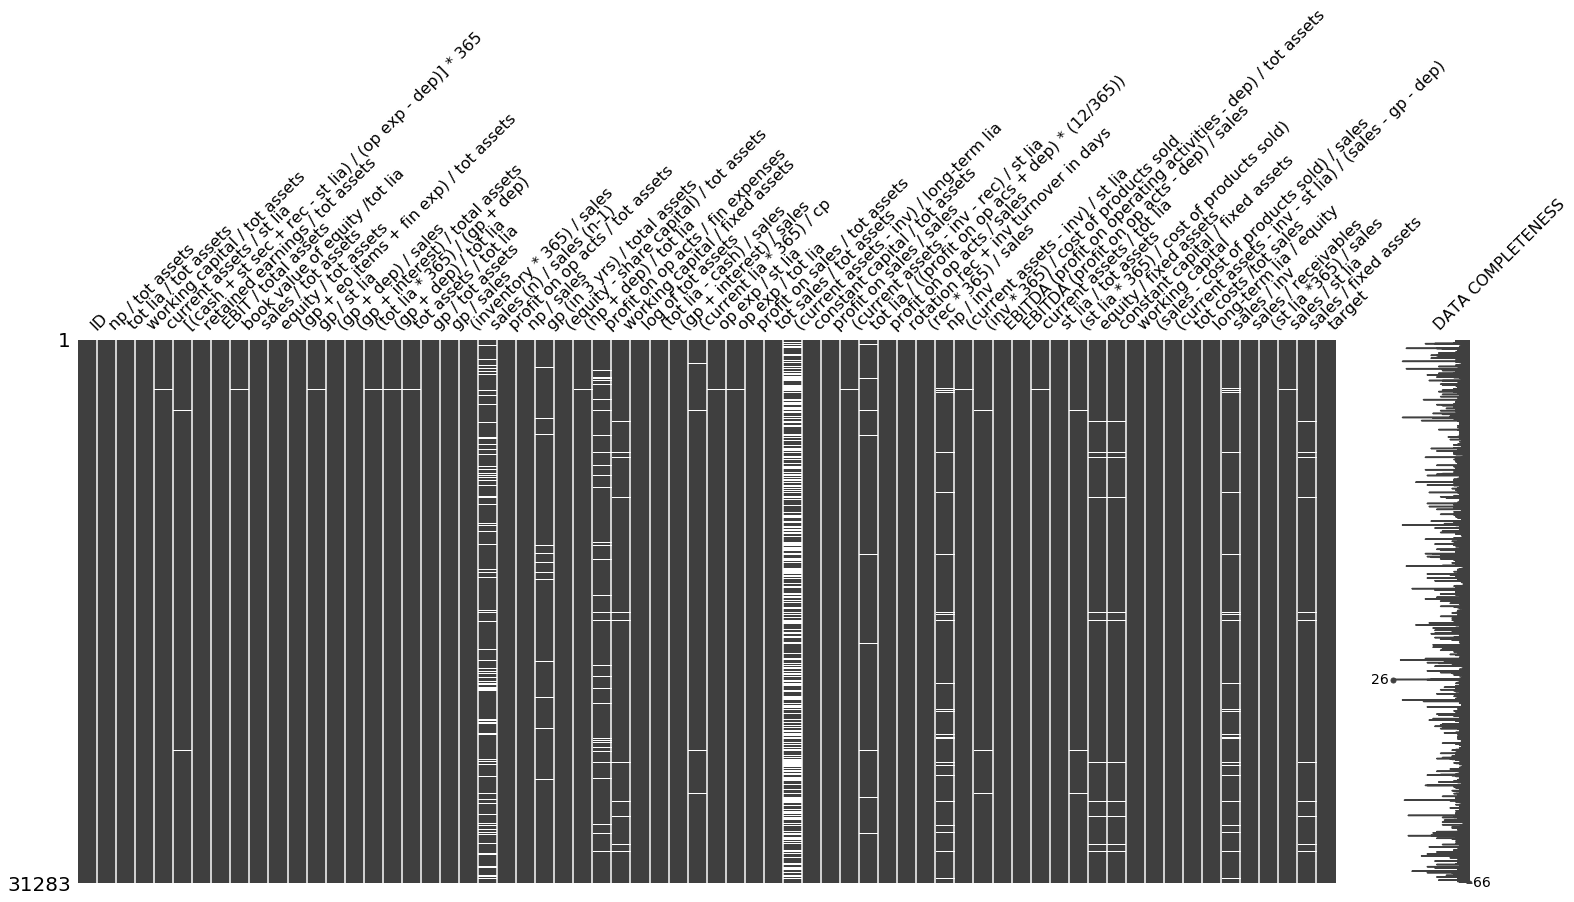

In [0]:
import missingno as msno 
msno.matrix(df,labels= True) 


We can slightly observe that missing values are in the same rows. We can visualize more clearly using Heat Map

In [0]:
df[df['np / tot assets'].isnull()]


ID  np / tot assets  tot lia / tot assets  \
6260    6261              NaN                   NaN   
12338  12339              NaN                   NaN   
13029  13030              NaN                   NaN   
16415  16416              NaN                   NaN   
19554  19555              NaN                   NaN   
27375  27376              NaN                   NaN   
28540  28541              NaN                   NaN   

       working capital / tot assets  current assets / st lia  \
6260                            NaN                   3.6531   
12338                           NaN                   2.5566   
13029                           NaN                      NaN   
16415                           NaN                   0.0000   
19554                           NaN                      NaN   
27375                           NaN                      NaN   
28540                           NaN                      NaN   

       [(cash + st sec + rec - st lia) / (op exp - dep)] * 365  \
6260                                              421.67         
12338                                             397.48         
13029                                           19866.00         
16415                                        -1076400.00         
19554                                               0.00         
27375                                            5172.10         
28540                                            3825.10         

       retained earnings / tot assets  EBIT / total assets  \
6260                              NaN                  NaN   
12338                             NaN                  NaN   
13029                             NaN                  NaN   
16415                             NaN                  NaN   
19554                             NaN                  NaN   
27375                             NaN                  NaN   
28540                             NaN                  NaN   

       book value of equity /tot lia  sales / tot assets  equity / tot assets  \
6260                          13.662                 NaN                  NaN   
12338                         12.427                 NaN                  NaN   
13029                            NaN             0.98556                  NaN   
16415                          0.000             7.25330                  NaN   
19554                            NaN             1.02750                  NaN   
27375                            NaN             1.02480                  NaN   
28540                            NaN             0.83894                  NaN   

       (gp + eo items + fin exp) / tot assets  gp / st lia  \
6260                                      NaN       3.7585   
12338                                     NaN       2.9670   
13029                                     NaN          NaN   
16415                                     NaN       0.0000   
19554                                     NaN          NaN   
27375                                     NaN          NaN   
28540                                     NaN          NaN   

       (gp + dep) / sales  (gp + interest) / total assets  \
6260             0.086424                             NaN   
12338            0.099541                             NaN   
13029            0.000000                             NaN   
16415            0.114890                             NaN   
19554            0.033826                             NaN   
27375            0.000000                             NaN   
28540            0.000000                             NaN   

       (tot lia * 365) / (gp + dep)  (gp + dep) / tot lia  \
6260                         266.42              1.370000   
12338                        277.89              1.313500   
13029                           NaN                   NaN   
16415                     218270.00              0.001672   
19554                          0.00                   NaN   
27375                        

###Total Assets are zero for the above rows so we are getting the result as Not a Number where ever we have denominator as Total Assets. The Bankruptcy cases in such situations are 0.14
######These 7 rows have null values in most of the columns. so we can remove these 7 rows 

In [0]:
df_n=df[df['np / tot assets'].isnull()]
df_n1=df.drop(df_n.index)

###Checking common null values after removing he above rows

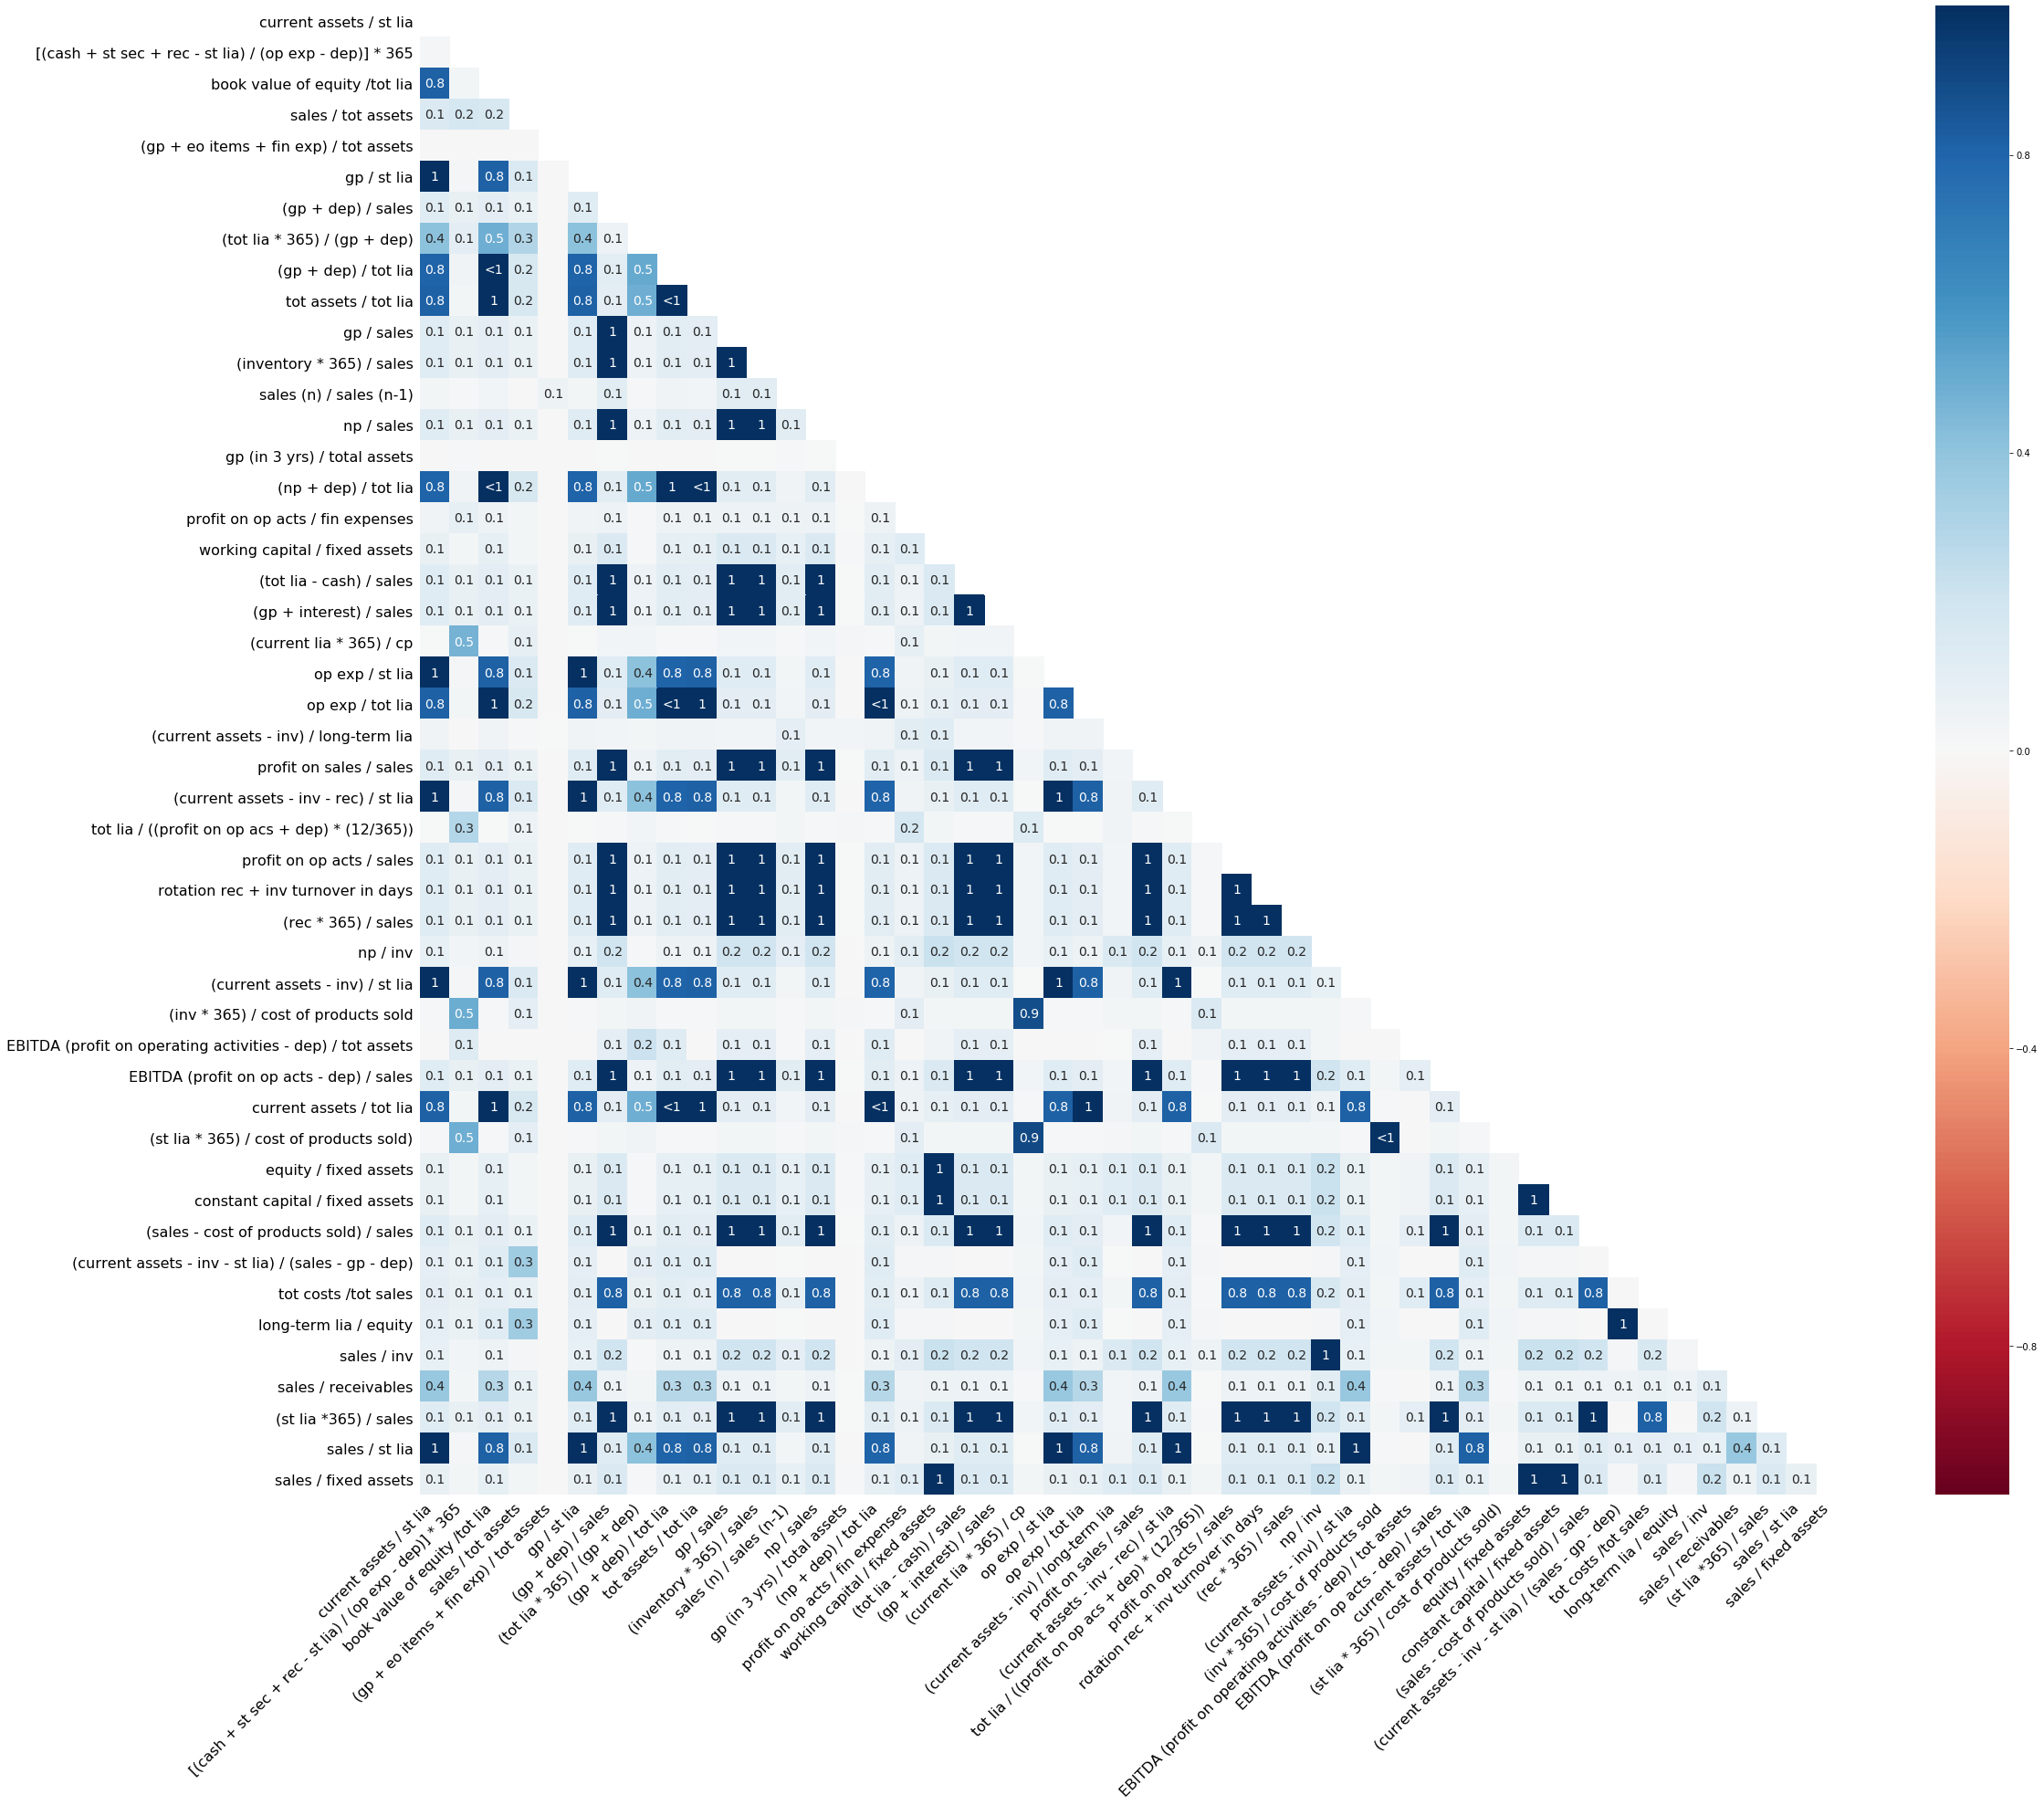

In [0]:
msno.heatmap(df_n1,figsize=(35,30))

In [0]:
df_n1[df_n1['op exp / tot lia'].isnull()]


ID  np / tot assets  tot lia / tot assets  \
496      497        -0.181370                   0.0   
547      548         0.000000                   0.0   
898      899         0.798230                   0.0   
1066    1067         0.288950                   0.0   
1246    1247        -0.004051                   0.0   
1668    1669        -0.204160                   0.0   
1676    1677         0.000000                   0.0   
1710    1711        -0.016118                   0.0   
1773    1774         0.000000                   0.0   
2348    2349       -46.893000                   0.0   
2354    2355         0.000000                   0.0   
2560    2561         0.291750                   0.0   
2611    2612         0.046422                   0.0   
2904    2905         0.000000                   0.0   
3147    3148         0.000000                   0.0   
3275    3276         0.000000                   0.0   
3790    3791        -3.477100                   0.0   
4293    4294         0.000000                   0.0   
4294    4295         0.450780                   0.0   
4474    4475         0.000000                   0.0   
6408    6409         0.000000                   0.0   
7707    7708         0.000000                   0.0   
8790    8791         0.639180                   0.0   
9038    9039         0.000000                   0.0   
10588  10589         0.000000                   0.0   
10664  10665        -0.003736                   0.0   
11013  11014         0.030181                   0.0   
11094  11095      -256.890000                   0.0   
12117  12118         0.000000                   0.0   
12461  12462        -1.718200                   0.0   
12520  12521         0.018179                   0.0   
12540  12541         0.000000                   0.0   
12611  12612         0.000000                   0.0   
12993  12994         0.000000                   0.0   
14325  14326         0.143180                   0.0   
14633  14634         0.143940                   0.0   
15343  15344         0.000000                   0.0   
15920  15921         0.000000                   0.0   
16919  16920         0.075456                   0.0   
17235  17236         0.000000                   0.0   
17558  17559         0.035972                   0.0   
17695  17696         0.005403                   0.0   
17776  17777         0.000000                   0.0   
17871  17872         0.000000                   0.0   
18432  18433        -0.001021                   0.0   
19152  19153        94.280000                   0.0   
19537  19538         5.530000                   0.0   
19999  20000         0.004713                   0.0   
20729  20730        -1.000000                   0.0   
22117  22118         0.000000                   0.0   
22251  22252         0.067623                   0.0   
22379  22380         0.056512                   0.0   
22625  22626         0.000000                   0.0   
23217  23218         0.000000                   0.0   
23803  23804         0.000000                   0.0   
24047  24048         0.000000                   0.0   
25006  25007         0.099704                   0.0   
25023  25024         0.064613                   0.0   
26278  26279        -0.045103                   0.0   
26501  26502        -0.198240                   0.0   
27493  27494         0.000000                   0.0   
27651  27652         0.000000                   0.0   
27760  27761         0.000000                   0.0   
27910  27911         0.000000                   0.0   
28310  28311         0.181590                   0.0   
28524  28525         0.798300                   0.0   
29050  29051         0.000000                   0.0   
30336  30337       -34.754000                   0.0   
30587  30588         0.308620                   0.0   

       working capital / tot assets  current assets / st lia  \
496                        1.000000                      NaN   
547                        0.66

###Where ever denominator has standard liabilities, total liabilities, the value is not a number.
###These persons might not be having standard liabilities, total liabilities.
###There is no point in imputing those values so we will be removing those rows 

In [0]:
df_n2=df_n1[df_n1['op exp / tot lia'].isnull()]


###Removing those rows and checking the patterns in null values


In [0]:
df_n3=df_n1.drop(df_n2.index)

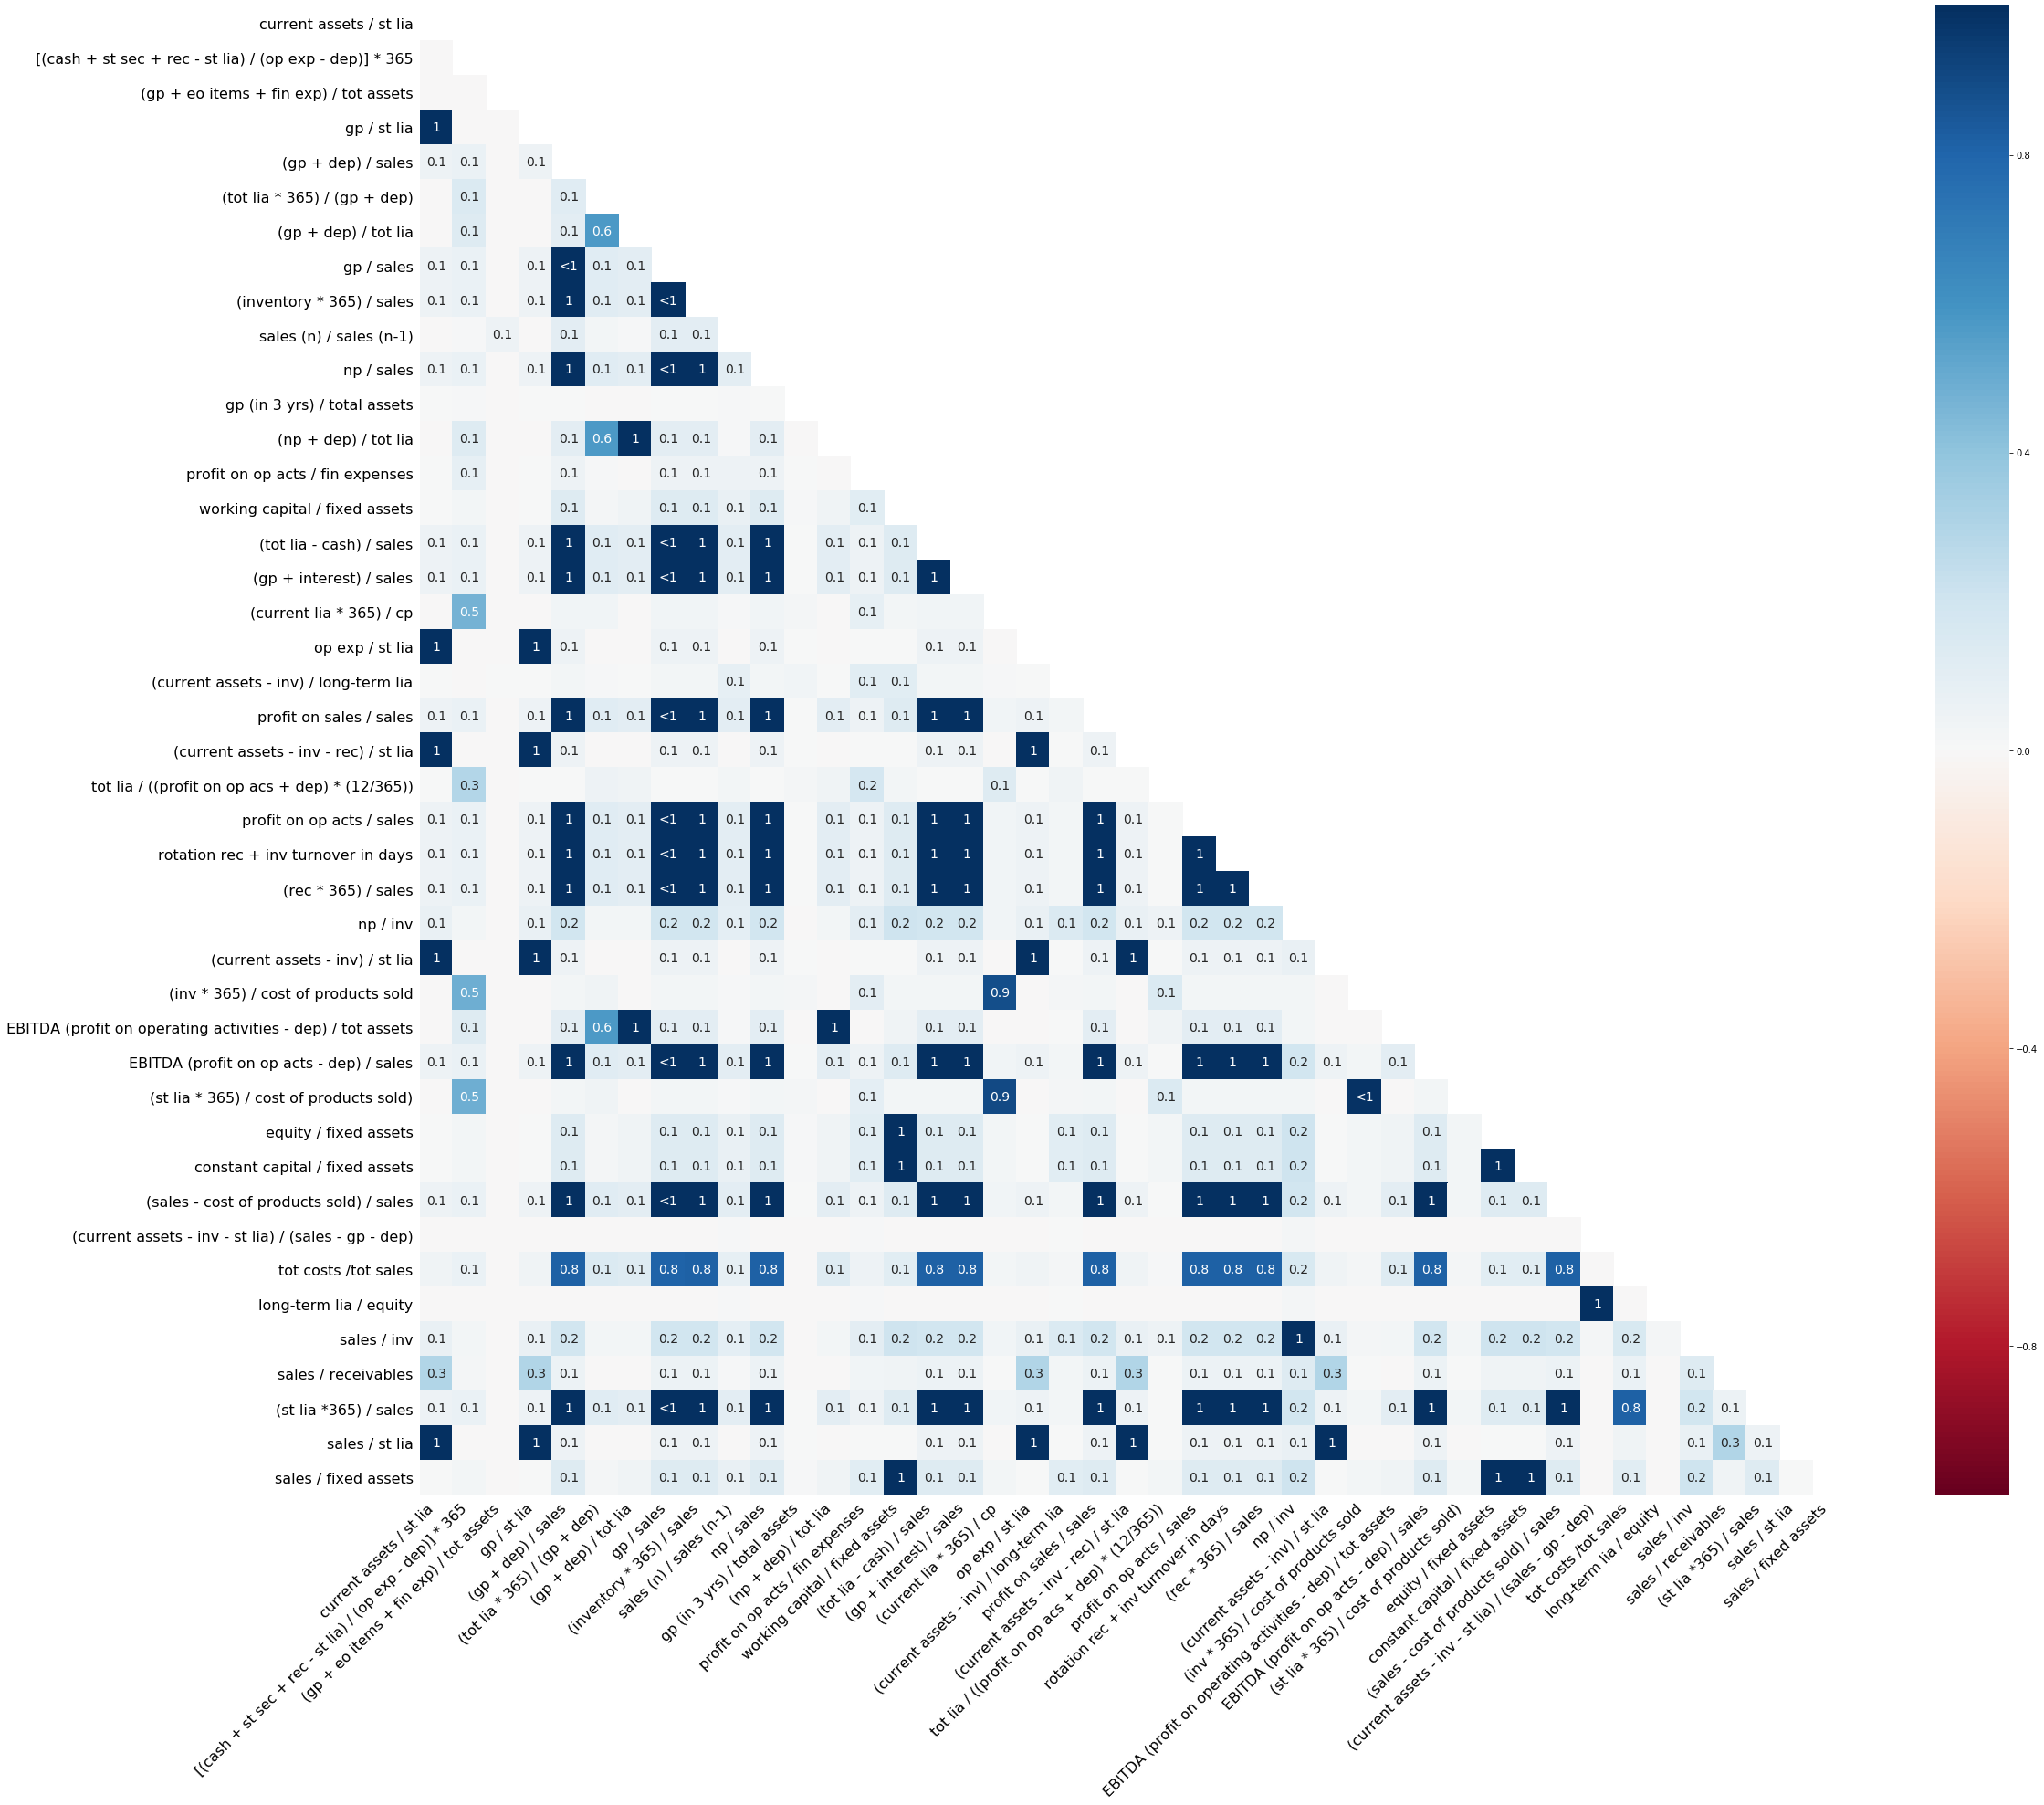

In [0]:
msno.heatmap(df_n3,figsize=(35,30))

In [0]:
df_n3[df_n3['(st lia *365) / sales'].isnull()]


ID  np / tot assets  tot lia / tot assets  \
219      220         0.313180              0.000038   
228      229        -0.071275              0.105200   
505      506         0.135170             10.455000   
766      767        -0.001505              0.288270   
915      916         0.002886              0.964450   
...      ...              ...                   ...   
30393  30394        -9.549900              0.293570   
30623  30624        -0.010252              0.940190   
30667  30668        -0.049505              0.059406   
30919  30920        -0.825200              1.847700   
31101  31102        -2.260100              0.000357   

       working capital / tot assets  current assets / st lia  \
219                        0.005276               140.190000   
228                        0.012489                 1.582600   
505                      -10.177000                 0.026550   
766                        0.421670                 2.462800   
915                       -0.801850                 0.055983   
...                             ...                      ...   
30393                      0.875430                 8.773900   
30623                     -0.713800                 0.240790   
30667                      0.940590                16.833000   
30919                      0.922290                12.994000   
31101                      0.020169                57.504000   

       [(cash + st sec + rec - st lia) / (op exp - dep)] * 365  \
219                                             2049.500         
228                                                  NaN         
505                                            -4111.300         
766                                            40342.000         
915                                           -85106.000         
...                                                  ...         
30393                                             32.811         
30623                                         -25064.000         
30667                                           -288.000         
30919                                            220.990         
31101                                             68.916         

       retained earnings / tot assets  EBIT / total assets  \
219                          0.313170             0.313070   
228                          0.000000            -0.071275   
505                        -13.603000             0.135170   
766                         -0.001505            -0.001505   
915                         -0.007475             0.002886   
...                               ...                  ...   
30393                        0.000000            -9.549900   
30623                       -0.011875            -0.010252   
30667                       -0.049505            -0.049505   
30919                       -0.163350            -0.825200   
31101                       -0.006846            -2.260100   

       book value of equity /tot lia  sales / tot assets  equity / tot assets  \
219                     26376.000000                 0.0             0.999750   
228                         8.505800                 0.0             0.894800   
505                        -0.904350                 0.0            -9.454800   
766                         0.711980                 0.0             0.205240   
915                         0.036862                 0.0             0.035551   
...                              ...                 ...                  ...   
30393                       2.406300                 0.0             0.706420   
30623                       0.063618                 0.0             0.059813   
30667                      15.833000                 0.0             0.940590   
30919                      -0.458800                 0.0            -0.847730   
31101                    2800.000000                 0.0             0.999450   

       (gp + eo items + fin exp) / tot assets  gp / st lia  \
219    

###We are getting nan where denominator is sales. It might be because there are no sales.
###Interestingly we can say that 10% of the times when there are no sales bankruptcy occured
###Removing these Null Values for further analysis


In [0]:
df_n3[df_n3['(st lia *365) / sales'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 219 to 31101
Data columns (total 66 columns):
ID                                                            92 non-null int64
np / tot assets                                               92 non-null float64
tot lia / tot assets                                          92 non-null float64
working capital / tot assets                                  92 non-null float64
current assets / st lia                                       89 non-null float64
[(cash + st sec + rec - st lia) / (op exp - dep)] * 365       87 non-null float64
retained earnings / tot assets                                92 non-null float64
EBIT / total assets                                           92 non-null float64
book value of equity /tot lia                                 92 non-null float64
sales / tot assets                                            92 non-null float64
equity / tot assets                                           92 non-null 

In [0]:
df_n4=df_n3[df_n3['(st lia *365) / sales'].isnull()]
df_n5=df_n3.drop(df_n4.index)


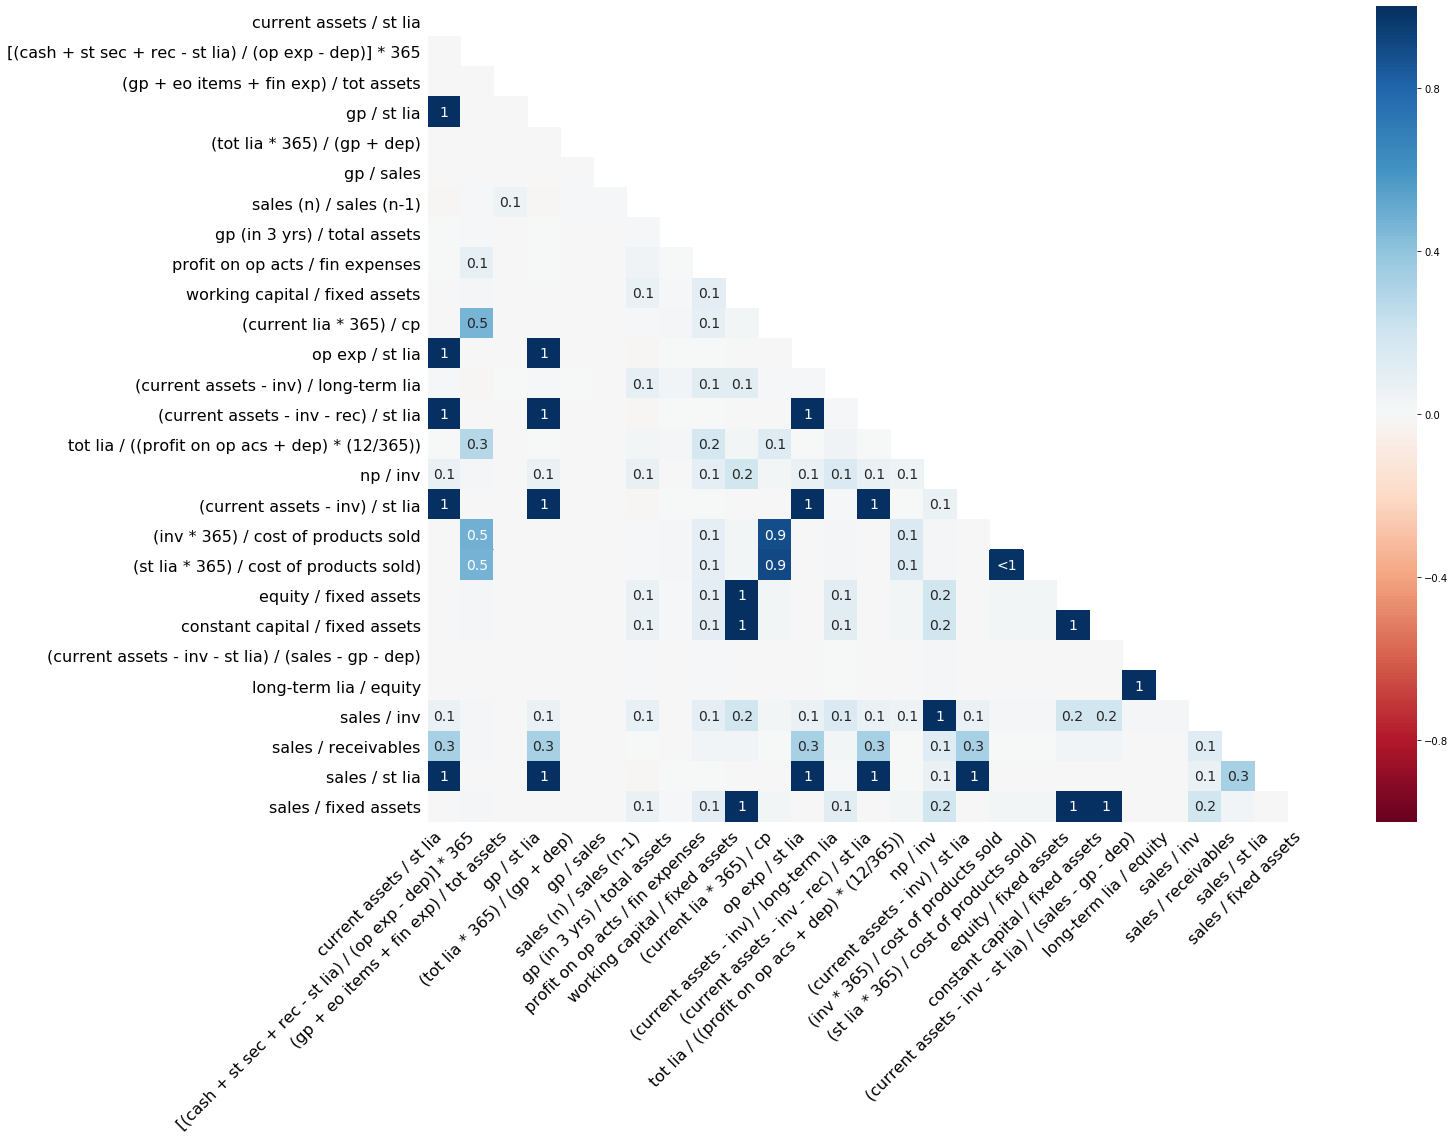

In [0]:
msno.heatmap(df_n5,figsize=(20,15))


In [0]:
df_n5[df_n5['sales / st lia'].isnull()]

ID  np / tot assets  tot lia / tot assets  \
880      881        -0.004889              0.798710   
2078    2079         0.270480              0.158980   
3624    3625         0.000000              0.077996   
3953    3954        -0.140720             15.125000   
4029    4030         0.039214              0.138560   
4404    4405         0.002131              0.388550   
5745    5746         0.038191              0.960600   
7989    7990         0.069518              0.021765   
8538    8539         0.055318              0.072678   
10255  10256         0.000000              0.069448   
10619  10620         0.038742              0.054437   
11020  11021         0.075075              0.382680   
11656  11657         0.071236              0.035269   
12471  12472         0.000000            -72.162000   
14383  14384         0.000000              0.730270   
15168  15169         0.029135              0.746050   
15609  15610         0.000000              0.085490   
17234  17235        -0.075907              0.508820   
18397  18398        -0.651270              5.889500   
18521  18522         0.364130              0.297160   
21249  21250         0.124640              0.037501   
24691  24692         0.037646              0.751040   
24707  24708         0.020059              0.540790   
24845  24846         0.000000              0.125660   
26528  26529         0.004173              0.505580   
26944  26945         0.052532              1.092200   
28418  28419         0.131510              0.629350   
29606  29607         0.084530              0.179290   

       working capital / tot assets  current assets / st lia  \
880                        0.949840                      NaN   
2078                       0.550020                      NaN   
3624                       0.599960                      NaN   
3953                       0.808750                      NaN   
4029                       0.527050                      NaN   
4404                       0.615120                      NaN   
5745                       0.210110                      NaN   
7989                       0.752000                      NaN   
8538                       0.764440                      NaN   
10255                      0.570630                      NaN   
10619                      0.697560                      NaN   
11020                      0.730830                      NaN   
11656                      0.717080                      NaN   
12471                      0.000000                      NaN   
14383                      0.246890                      NaN   
15168                      0.332820                      NaN   
15609                      0.506120                      NaN   
17234                      0.783090                      NaN   
18397                      0.052956                      NaN   
18521                      0.848790                      NaN   
21249                      0.743420                      NaN   
24691                      0.657480                      NaN   
24707                      0.651320                      NaN   
24845                      0.509700                      NaN   
26528                      0.174440                      NaN   
26944                      0.375370                      NaN   
28418                      0.957170                      NaN   
29606                      0.985180                      NaN   

       [(cash + st sec + rec - st lia) / (op exp - dep)] * 365  \
880                                             114.5600         
2078                                             41.7600         
3624                                           2567.6000         
3953                                              0.0000         
4029                                            128.3000         
4404                                              0.0000         
5745                                              0.0000         
7989                         

###Whenever standard liabilities are zero there is no bankrution


In [0]:
###Removing these values
df_n6=df_n5[df_n5['sales / st lia'].isnull()]
df_n7=df_n5.drop(df_n6.index)

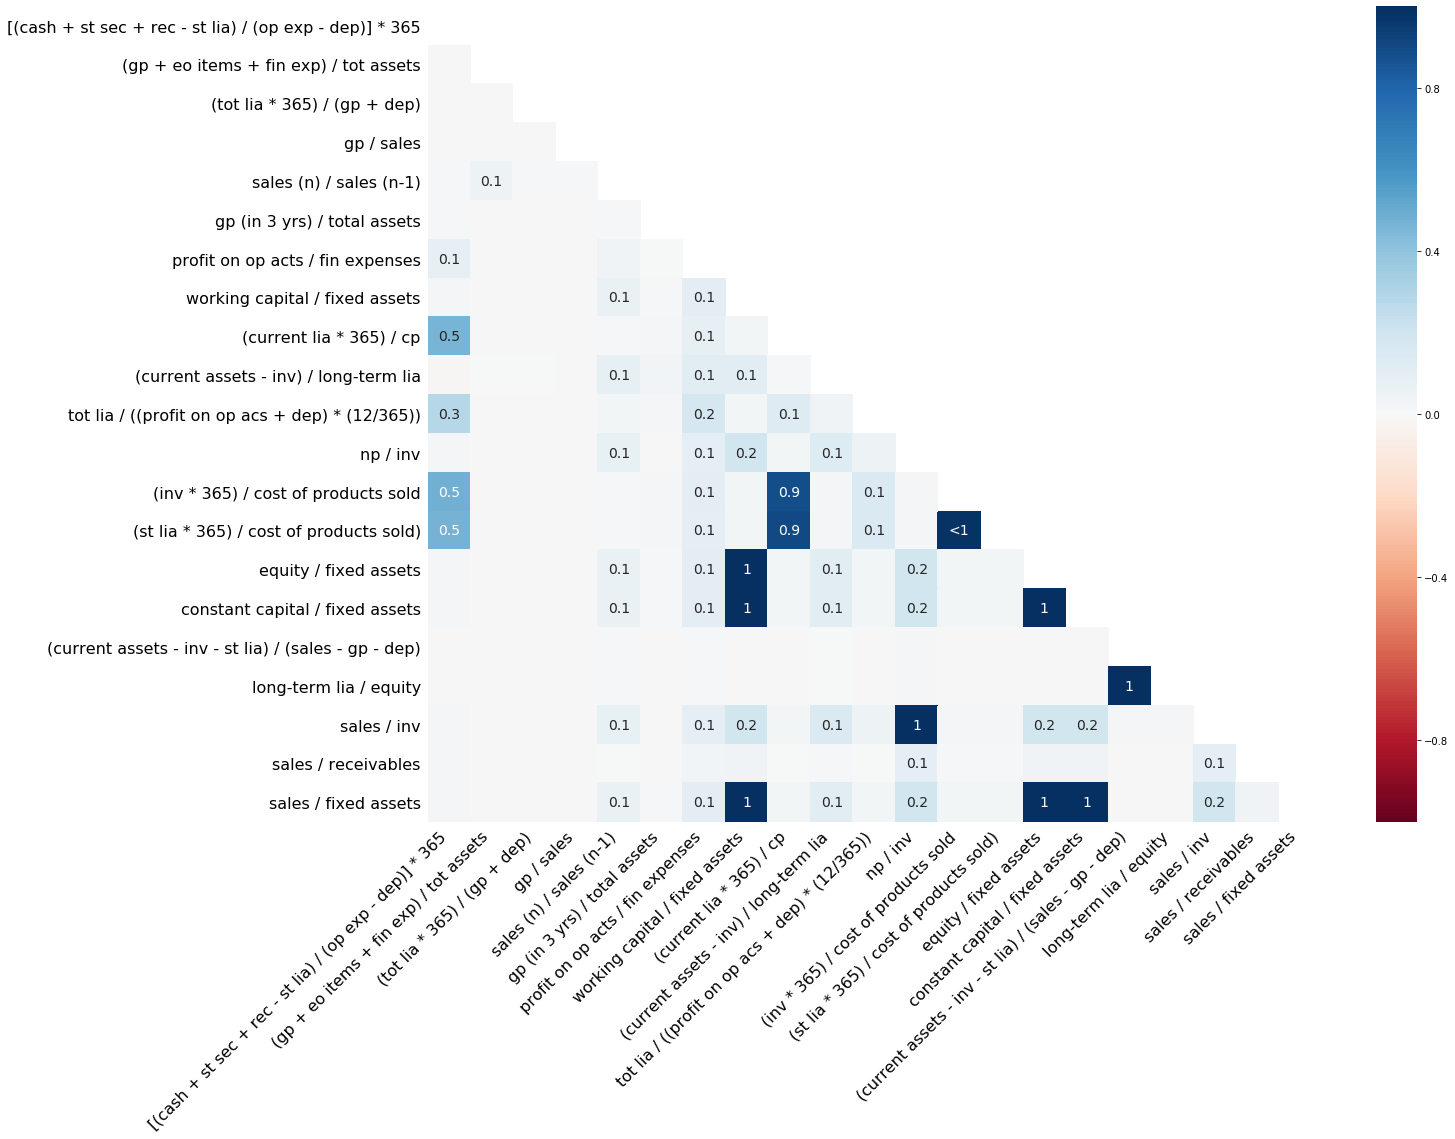

In [0]:
msno.heatmap(df_n7,figsize=(20,15))


In [0]:
df_n7[df_n7['sales / fixed assets'].isnull()]

ID  np / tot assets  tot lia / tot assets  \
22        23         0.361870              0.014146   
43        44         0.335750              0.035402   
45        46         0.035971              0.122300   
55        56        -0.490460              3.178900   
62        63        -0.286470              2.880500   
...      ...              ...                   ...   
31065  31066        -0.144580              1.170600   
31086  31087         0.000094              0.921990   
31145  31146         0.043218              0.940470   
31170  31171         0.419580              0.589700   
31176  31177        -1.903500              0.299710   

       working capital / tot assets  current assets / st lia  \
22                         0.985850                 70.69000   
43                         0.964600                 28.24700   
45                         0.877700                  8.17650   
55                        -1.457700                  0.40688   
62                        -1.880500                  0.34717   
...                             ...                      ...   
31065                     -0.170580                  0.85428   
31086                      0.078012                  1.08460   
31145                      0.487780                  1.95230   
31170                      0.548000                  2.21240   
31176                      0.700290                  3.33650   

       [(cash + st sec + rec - st lia) / (op exp - dep)] * 365  \
22                                         -4.106800e+02         
43                                          5.835100e+02         
45                                          3.241900e+01         
55                                         -1.709500e+02         
62                                         -7.797100e+02         
...                                                  ...         
31065                                      -7.138700e+01         
31086                                      -2.722100e+06         
31145                                      -1.924900e+01         
31170                                       2.996100e+01         
31176                                       8.564400e+00         

       retained earnings / tot assets  EBIT / total assets  \
22                          -0.160280             0.361870   
43                           0.000000             0.415050   
45                           0.000000             0.043165   
55                          -1.688400            -0.490460   
62                          -1.634700            -0.286470   
...                               ...                  ...   
31065                       -0.058339            -0.144580   
31086                        0.000000             0.000094   
31145                        0.000000             0.052614   
31170                       -0.057191             0.526430   
31176                        0.000000            -1.903500   

       book value of equity /tot lia  sales / tot assets  equity / tot assets  \
22                         69.690000            1.901500             0.985850   
43                         27.247000            1.010400             0.964600   
45                          7.176500            6.956800             0.877700   
55                         -0.685420            2.765500            -2.178900   
62                         -0.652830            0.813720            -1.880500   
...                              ...                 ...                  ...   
31065                      -0.146260            3.095800            -0.171210   
31086                       0.084612            0.006483             0.078012   
31145                       0.063294            2.092800             0.059526   
31170                       0.695770            4.617000             0.410300   
31176                       2.336500            7.086000             0.700290   

       (gp + eo items + fin exp) / tot assets  gp / st lia  \
22     

In [0]:
df_n8=df_n7[df_n7['sales / fixed assets'].isnull()]


In [0]:
df_n8['target'].value_counts()

0    502
1     47
Name: target, dtype: int64

###Whenever fixed assets are zero the bankruptcy is 8.6%

In [0]:
###Dropping those rows for further analysis

In [0]:
df_n9=df_n7.drop(df_n8.index)

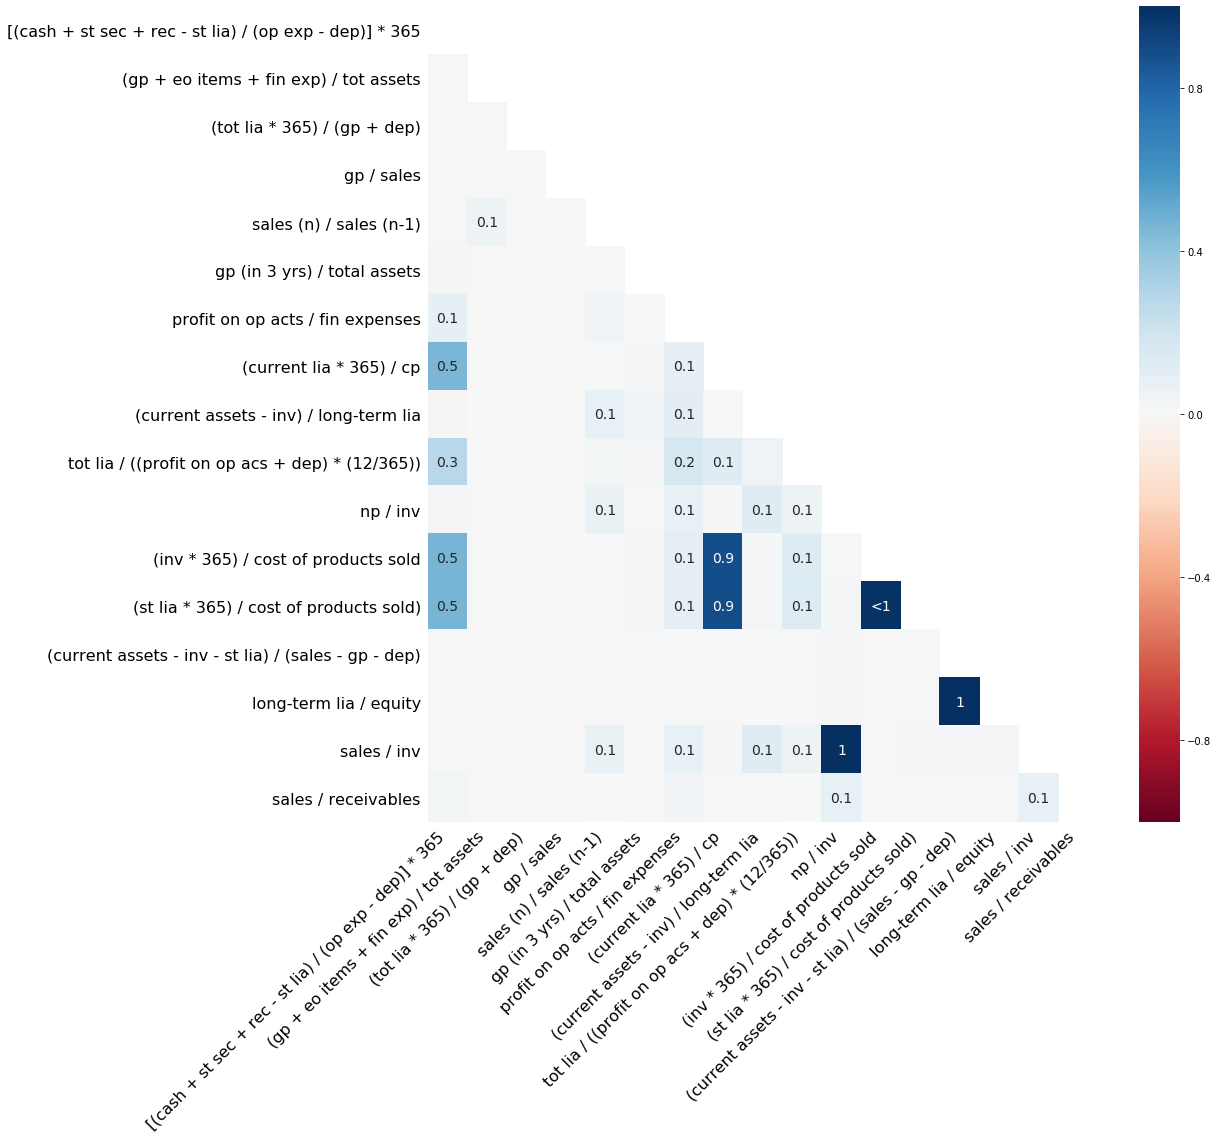

In [0]:
msno.heatmap(df_n9,figsize=(15,15))


In [0]:
df_n9[df_n9['(st lia * 365) / cost of products sold)'].isnull()]

ID  np / tot assets  tot lia / tot assets  \
67        68         0.000000               0.40918   
74        75         0.140430               0.79384   
91        92        -0.122050               0.88456   
169      170         0.187590               0.49622   
234      235         0.019097               0.51017   
...      ...              ...                   ...   
30780  30781         0.349250               0.38083   
30913  30914         0.000000               0.68446   
30967  30968         0.128810               0.38794   
31169  31170         0.113220               0.67889   
31273  31274         0.060877               0.48564   

       working capital / tot assets  current assets / st lia  \
67                        -0.013524                  0.95634   
74                         0.147380                  1.18560   
91                        -0.326020                  0.63143   
169                        0.470510                  1.97340   
234                        0.389730                  1.78290   
...                             ...                      ...   
30780                      0.632720                  2.99380   
30913                      0.306290                  2.45590   
30967                      0.272090                  1.70140   
31169                      0.284010                  1.41840   
31273                      0.524550                  2.13290   

       [(cash + st sec + rec - st lia) / (op exp - dep)] * 365  \
67                                                17.773         
74                                               -11.087         
91                                               579.870         
169                                              -29.960         
234                                             -179.950         
...                                                  ...         
30780                                            -10.321         
30913                                                NaN         
30967                                            204.720         
31169                                            100.870         
31273                                            -51.101         

       retained earnings / tot assets  EBIT / total assets  \
67                          -0.059931            -0.052241   
74                          -0.271520             0.140430   
91                          -0.191450            -0.122050   
169                          0.207770             0.187590   
234                          0.000000             0.019097   
...                               ...                  ...   
30780                        0.000000             0.349250   
30913                        0.074114             0.050782   
30967                        0.000000             0.128810   
31169                        0.000000             0.113220   
31273                        0.000000             0.060877   

       book value of equity /tot lia  sales / tot assets  equity / tot assets  \
67                           1.44390             1.78710              0.59082   
74                           0.25970             5.50490              0.20616   
91                           0.13051             0.78650              0.11544   
169                          1.01520             2.30160              0.50378   
234                          0.96014             0.99011              0.48983   
...                              ...                 ...                  ...   
30780                        1.62580             2.14360              0.61917   
30913                        0.46100             0.81221              0.31554   
30967                        1.57770             4.17680              0.61206   
31169                        0.47299             1.32430              0.32111   
31273                        1.05910             3.10840              0.51436   

       (gp + eo items + fin exp) / tot assets  gp / st lia  \
67     

In [0]:
df_n9[df_n9['sales / inv'].isnull()]

ID  np / tot assets  tot lia / tot assets  \
19        20         0.060326              0.582910   
26        27         0.010856              0.001272   
40        41         0.028623              0.961380   
46        47         0.005760              0.000520   
56        57         0.209950              0.668400   
...      ...              ...                   ...   
31213  31214         0.087009              0.510600   
31224  31225        -0.174810              0.598080   
31225  31226         0.013054              0.321790   
31235  31236         0.005088              0.938950   
31262  31263        -0.026879              0.905050   

       working capital / tot assets  current assets / st lia  \
19                         0.208570                 1.357800   
26                         0.831420               654.740000   
40                         0.024176                 1.025100   
46                         0.409150               788.090000   
56                         0.236920                 1.354500   
...                             ...                      ...   
31213                      0.561140                 2.578100   
31224                      0.347750                 1.581400   
31225                      0.451130                 2.401900   
31235                     -0.842630                 0.029236   
31262                     -0.092022                 0.875360   

       [(cash + st sec + rec - st lia) / (op exp - dep)] * 365  \
19                                              14.98100         
26                                           21442.00000         
40                                              -0.61439         
46                                           20384.00000         
56                                              41.13300         
...                                                  ...         
31213                                           79.17500         
31224                                          118.25000         
31225                                           87.76900         
31235                                        -5856.00000         
31262                                          -15.87200         

       retained earnings / tot assets  EBIT / total assets  \
19                          -0.190860             0.060326   
26                           0.000000             0.013430   
40                           0.196680             0.035343   
46                           0.000000             0.007111   
56                          -0.270150             0.209950   
...                               ...                  ...   
31213                        0.000000             0.128340   
31224                       -0.084573            -0.174810   
31225                        0.403130             0.014778   
31235                       -0.039133             0.005088   
31262                       -0.092963            -0.025870   

       book value of equity /tot lia  sales / tot assets  equity / tot assets  \
19                          0.715530            4.824500             0.417090   
26                        785.300000            0.079115             0.998730   
40                          0.035030            1.006600             0.033677   
46                       1922.700000            0.013797             0.999480   
56                          0.496110            3.618800             0.331600   
...                              ...                 ...                  ...   
31213                       0.958490            2.584000             0.489400   
31224                       0.672010            0.921690             0.401920   
31225                       2.107600            1.978800             0.678210   
31235                       0.065018            0.068745             0.061049   
31262                       0.104910            2.230700             0.094952   

       (gp + eo items + fin exp) / tot assets  gp / st lia  \
19     

In [0]:
df_n10=df_n9[df_n9['(st lia * 365) / cost of products sold)'].isnull()]

In [0]:
df_n11=df_n9.drop(df_n10.index)

In [0]:
df_n11[df_n11['sales / inv'].isnull()]

ID  np / tot assets  tot lia / tot assets  \
19        20         0.060326              0.582910   
26        27         0.010856              0.001272   
40        41         0.028623              0.961380   
46        47         0.005760              0.000520   
56        57         0.209950              0.668400   
...      ...              ...                   ...   
31213  31214         0.087009              0.510600   
31224  31225        -0.174810              0.598080   
31225  31226         0.013054              0.321790   
31235  31236         0.005088              0.938950   
31262  31263        -0.026879              0.905050   

       working capital / tot assets  current assets / st lia  \
19                         0.208570                 1.357800   
26                         0.831420               654.740000   
40                         0.024176                 1.025100   
46                         0.409150               788.090000   
56                         0.236920                 1.354500   
...                             ...                      ...   
31213                      0.561140                 2.578100   
31224                      0.347750                 1.581400   
31225                      0.451130                 2.401900   
31235                     -0.842630                 0.029236   
31262                     -0.092022                 0.875360   

       [(cash + st sec + rec - st lia) / (op exp - dep)] * 365  \
19                                              14.98100         
26                                           21442.00000         
40                                              -0.61439         
46                                           20384.00000         
56                                              41.13300         
...                                                  ...         
31213                                           79.17500         
31224                                          118.25000         
31225                                           87.76900         
31235                                        -5856.00000         
31262                                          -15.87200         

       retained earnings / tot assets  EBIT / total assets  \
19                          -0.190860             0.060326   
26                           0.000000             0.013430   
40                           0.196680             0.035343   
46                           0.000000             0.007111   
56                          -0.270150             0.209950   
...                               ...                  ...   
31213                        0.000000             0.128340   
31224                       -0.084573            -0.174810   
31225                        0.403130             0.014778   
31235                       -0.039133             0.005088   
31262                       -0.092963            -0.025870   

       book value of equity /tot lia  sales / tot assets  equity / tot assets  \
19                          0.715530            4.824500             0.417090   
26                        785.300000            0.079115             0.998730   
40                          0.035030            1.006600             0.033677   
46                       1922.700000            0.013797             0.999480   
56                          0.496110            3.618800             0.331600   
...                              ...                 ...                  ...   
31213                       0.958490            2.584000             0.489400   
31224                       0.672010            0.921690             0.401920   
31225                       2.107600            1.978800             0.678210   
31235                       0.065018            0.068745             0.061049   
31262                       0.104910            2.230700             0.094952   

       (gp + eo items + fin exp) / tot assets  gp / st lia  \
19     

In [0]:
df_n12=df_n11[df_n11['sales / inv'].isnull()]

In [0]:
df_n12['target'].value_counts()

0    1158
1      94
Name: target, dtype: int64

###7.5% of times bankruptcy is found when investments are zero

In [0]:
df_n13=df_n11.drop(df_n12.index)

In [0]:
pd.set_option("display.max_rows",70)

df_n13.isnull().sum()

ID                                                                0
np / tot assets                                                   0
tot lia / tot assets                                              0
working capital / tot assets                                      0
current assets / st lia                                           0
[(cash + st sec + rec - st lia) / (op exp - dep)] * 365           5
retained earnings / tot assets                                    0
EBIT / total assets                                               0
book value of equity /tot lia                                     0
sales / tot assets                                                0
equity / tot assets                                               0
(gp + eo items + fin exp) / tot assets                           25
gp / st lia                                                       0
(gp + dep) / sales                                                0
(gp + interest) / total assets                  

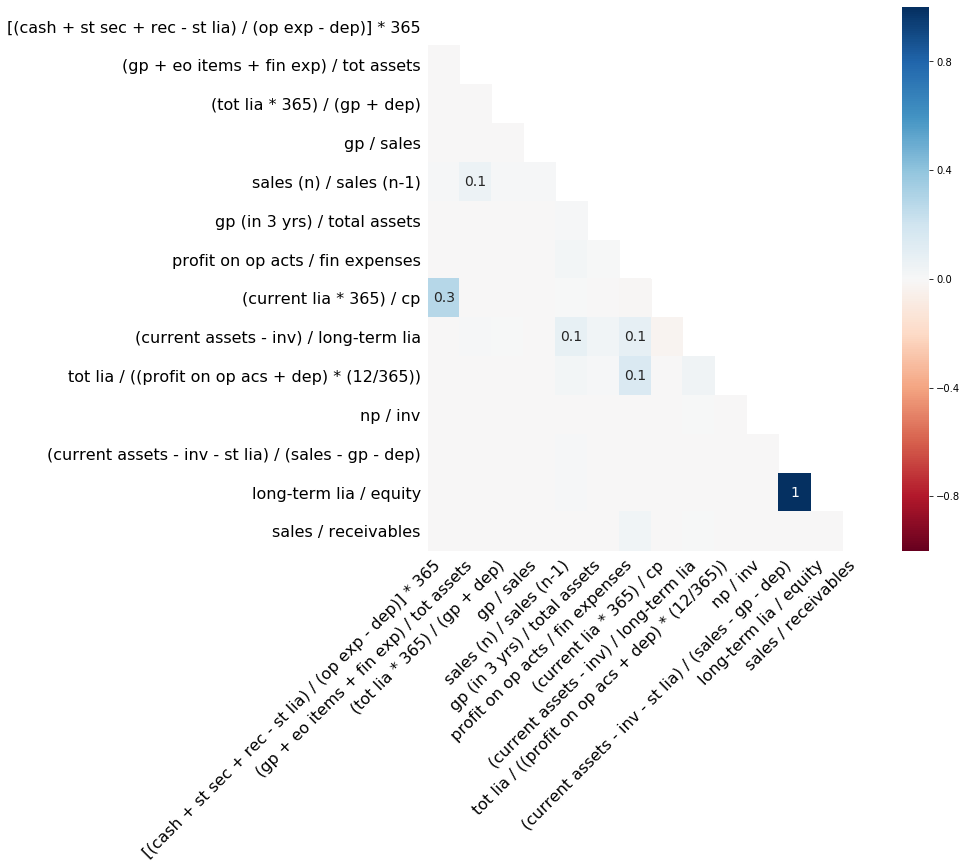

In [0]:
msno.heatmap(df_n13,figsize=(10,10))


In [0]:
df_n13[df_n13['long-term lia / equity'].isnull()]

ID  np / tot assets  tot lia / tot assets  \
2892  2893         0.047964               0.94815   

      working capital / tot assets  current assets / st lia  \
2892                      -0.39646                  0.51689   

      [(cash + st sec + rec - st lia) / (op exp - dep)] * 365  \
2892                                           -12762.0         

      retained earnings / tot assets  EBIT / total assets  \
2892                             0.0             0.047964   

      book value of equity /tot lia  sales / tot assets  equity / tot assets  \
2892                            0.0              5.9659                  0.0   

      (gp + eo items + fin exp) / tot assets  gp / st lia  (gp + dep) / sales  \
2892                                0.069576     0.058447            0.014167   

      (gp + interest) / total assets  (tot lia * 365) / (gp + dep)  \
2892                        0.047964                        4094.5   

      (gp + dep) / tot lia  tot assets / tot lia  gp / tot assets  gp / sales  \
2892              0.089144                1.0547         0.047964     0.00804   

      (inventory * 365) / sales  sales (n) / sales (n-1)  \
2892                     7.4483                      NaN   

      profit on op acts / tot assets  np / sales  \
2892                         0.06908     0.00804   

      gp (in 3 yrs) / total assets  (equity - share capital) / tot assets  \
2892                      0.047964                              -0.002899   

      (np + dep) / tot lia  profit on op acts / fin expenses  \
2892              0.089144                            3.1963   

      working capital / fixed assets  log of tot assets  \
2892                        -0.68852             3.5378   

      (tot lia - cash) / sales  (gp + interest) / sales  \
2892                    0.1534                 0.011662   

      (current lia * 365) / cp  op exp / st lia  op exp / tot lia  \
2892                    50.806           7.1891            6.2223   

      profit on sales / tot assets  tot sales / tot assets  \
2892                      0.070211                  5.9659   

      (current assets - inv) / long-term lia  constant capital / tot assets  \
2892                                  2.3719                        0.12751   

      profit on sales / sales  (current assets - inv - rec) / st lia  \
2892                 0.011769                               0.073423   

      tot lia / ((profit on op acs + dep) * (12/365))  \
2892                                          0.29918   

      profit on op acts / sales  rotation rec + inv turnover in days  \
2892                   0.011579                               22.265   

      (rec * 365) / sales  np / inv  (current assets - inv) / st lia  \
2892               14.817   0.39398                          0.36854   

      (inv * 365) / cost of products sold  \
2892                               7.5319   

      EBITDA (profit on operating activities - dep) / tot assets  \
2892                                           0.032522            

      EBITDA (profit on op acts - dep) / sales  current assets / tot lia  \
2892                                  0.005451                   0.44737   

      st lia / tot assets  (st lia * 365) / cost of products sold)  \
2892              0.82064                                   0.1391   

      equity / fixed assets  constant capital / fixed assets  working capital  \
2892                    0.0                          0.22144          -1367.7   

      (sales - cost of products sold) / sales  \
2892                                 0.011769   

      (current assets - inv - st lia) / (sales - gp - dep)  \
2892                                                NaN      

      tot costs /tot sales  long-term lia / equity  sales / inv  \
2892               0.99252                     NaN       49.005   

      sales / receivables  (st lia *365) / sales  sales / st lia  \
2892               24.634                 50.208          7

In [0]:
df_n14=df_n13[df_n13['long-term lia / equity'].isnull()]

In [0]:
df_n15=df_n13.drop(df_n14.index)

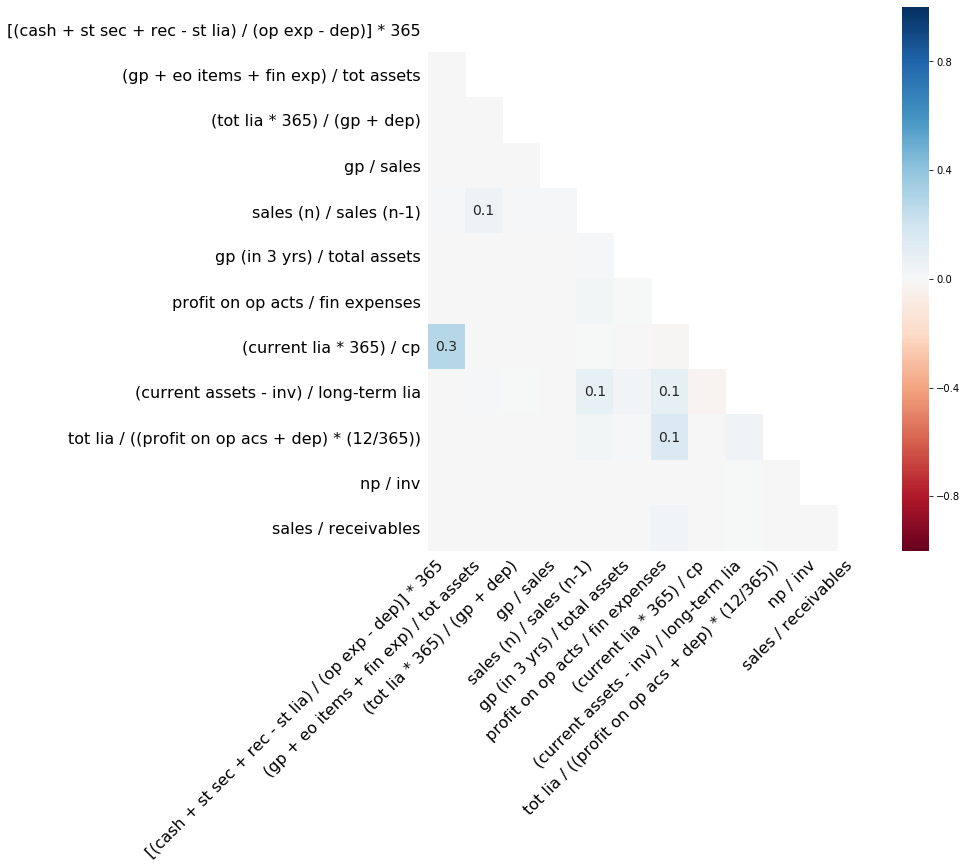

In [0]:
msno.heatmap(df_n15,figsize=(10,10))


In [0]:
null_columns=df_n15.columns[df_n15.isnull().any()]
df_n15[null_columns].isnull().sum()

[(cash + st sec + rec - st lia) / (op exp - dep)] * 365        5
(gp + eo items + fin exp) / tot assets                        25
(tot lia * 365) / (gp + dep)                                   1
gp / sales                                                     1
sales (n) / sales (n-1)                                     3637
gp (in 3 yrs) / total assets                                 611
profit on op acts / fin expenses                            1564
(current lia * 365) / cp                                      39
(current assets - inv) / long-term lia                     12136
tot lia / ((profit on op acs + dep) * (12/365))              408
np / inv                                                       1
sales / receivables                                           12
dtype: int64

In [0]:
df_n16=df_n15.drop(["(current assets - inv) / long-term lia"],axis=1)

##Rules with Null Values





In [0]:
a=df[df['np / tot assets'].isnull()]
a['target'].value_counts()

0    6
1    1
Name: target, dtype: int64

###When total Assets are 0 there is 14.2% of bankruptcy

In [0]:
b=df[df['op exp / tot lia'].isnull()]
b['target'].value_counts()

0    70
1     3
Name: target, dtype: int64

###When total liabilities are zero there is 4.1% of bankruptcy

In [0]:
c=df[df['(st lia *365) / sales'].isnull()]
c['target'].value_counts()

0    91
1    10
Name: target, dtype: int64

### When total sales are zero there is 10.1% of bankruptcy

In [0]:
d=df[df['sales / st lia'].isnull()]
d['target'].value_counts()

0    98
1     4
Name: target, dtype: int64

###When standard liabilities are zero there is 3.9% of bankruptcy

In [0]:
e=df[df['sales / fixed assets'].isnull()]
e['target'].value_counts()

0    548
1     53
Name: target, dtype: int64

###When fixed assets are zero there is 8% of bankruptcy

In [0]:
f=df[df['(st lia * 365) / cost of products sold)'].isnull()]
f['target'].value_counts()

0    211
1      1
Name: target, dtype: int64

###If cost of products sold is zero there is almost no bankruptcy

In [0]:
g=df[df['sales / inv'].isnull()]
g['target'].value_counts()

0    1443
1     127
Name: target, dtype: int64

### When investment is zero there is 8% of bankruptcy

##Visualizations:


In [0]:
%%html
<div class='tableauPlaceholder' id='viz1578744415900' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ba&#47;Bankruptcy_15787443910150&#47;Bankruptcy&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Bankruptcy_15787443910150&#47;Bankruptcy' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ba&#47;Bankruptcy_15787443910150&#47;Bankruptcy&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1578744415900');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##Imputing remaining null values with median

In [0]:
df_n17=df_n16.copy()
df_n17[df_n17.columns]=df_n17[df_n17.columns].fillna(df_n17[df_n17.columns].median())


In [0]:
null_columns=df_n17.columns[df_n17.isnull().any()]
df_n17[null_columns].isnull().sum()

Series([], dtype: float64)

#Outliers Detection




In [0]:
df1=df_n17.copy()

In [0]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)

In [0]:
df2=(df1 < (Q1 - 3 * IQR)) |(df1 > (Q3 + 3 * IQR)) 


In [0]:
df1.iloc[3615,:]

ID                                                            3900.000000
np / tot assets                                                  0.033207
tot lia / tot assets                                             0.743830
working capital / tot assets                                     0.029886
current assets / st lia                                          1.080100
[(cash + st sec + rec - st lia) / (op exp - dep)] * 365        -15.336000
retained earnings / tot assets                                   0.000000
EBIT / total assets                                              0.050522
book value of equity /tot lia                                    0.344390
sales / tot assets                                               1.972700
equity / tot assets                                              0.256170
(gp + eo items + fin exp) / tot assets                           0.099146
gp / st lia                                                      0.135410
(gp + dep) / sales                    

In [0]:
df2

ID  np / tot assets  tot lia / tot assets  \
0      False            False                 False   
1      False            False                 False   
2      False            False                 False   
3      False            False                 False   
4      False            False                 False   
...      ...              ...                   ...   
31278  False            False                 False   
31279  False            False                 False   
31280  False            False                 False   
31281  False            False                 False   
31282  False            False                 False   

       working capital / tot assets  current assets / st lia  \
0                             False                    False   
1                             False                    False   
2                             False                    False   
3                             False                    False   
4                             False                    False   
...                             ...                      ...   
31278                         False                    False   
31279                         False                     True   
31280                         False                    False   
31281                         False                    False   
31282                         False                    False   

       [(cash + st sec + rec - st lia) / (op exp - dep)] * 365  \
0                                                  False         
1                                                  False         
2                                                  False         
3                                                  False         
4                                                  False         
...                                                  ...         
31278                                              False         
31279                                              False         
31280                                              False         
31281                                              False         
31282                                              False         

       retained earnings / tot assets  EBIT / total assets  \
0                               False                False   
1                               False                False   
2                               False                False   
3                                True                False   
4                               False                False   
...                               ...                  ...   
31278                           False                False   
31279                           False                False   
31280                           False                False   
31281                           False                False   
31282                            True                False   

       book value of equity /tot lia  sales / tot assets  equity / tot assets  \
0                              False               False                False   
1                              False               False                False   
2                              False               False                False   
3                              False               False                False   
4                              False               False                False   
...                              ...                 ...                  ...   
31278                          False               False                False   
31279                           True               False                False   
31280                          False               False                False   
31281                          False               False                False   
31282                          False               False                False   

       (gp + eo items + fin exp) / tot assets  gp / st lia  \
0      

In [0]:
df3=df2.copy()

###Finding Patterns in Outliers

In [0]:
df4=df3[df3==True].count(axis=1)


In [0]:
from pprint import pprint
pd.set_option("display.max_rows",200)
out= df4.sort_values(ascending=False)

In [0]:
out.head(200)

3616     41
8157     38
18328    37
6823     37
11725    37
15936    36
30404    36
4017     36
27716    36
16122    36
24626    36
30753    35
24521    35
21392    35
9732     35
9550     34
1299     34
9210     34
979      34
28703    34
5944     34
25086    34
6572     33
18630    33
889      33
18224    33
1525     33
26165    33
15386    32
6370     32
15738    32
16783    32
28341    32
2980     32
24564    32
669      32
19044    32
25667    31
16036    31
6516     31
15553    31
25399    31
30783    31
28121    31
23975    30
30053    30
3205     30
2451     30
19972    30
972      30
20393    29
27431    29
29818    29
29949    29
16228    29
5801     28
22258    28
29181    28
10955    28
545      28
15690    28
26316    28
6647     28
22573    28
16221    28
25820    28
11376    28
12710    28
18747    28
19092    28
18645    28
9785     28
11873    27
12787    27
10968    27
30694    27
5177     27
22553    27
3775     27
16484    27
3321     27
22181    27
4679     27
4825

The above rows have outliers in their respective columns ie in row 3616, 41 features have outliers


In [0]:
out[out > 5].count()

4733

In [0]:
outliers=out[out > 5].index

### Removing rows in which Outliers are in more than 10 features

In [0]:
df_n18=df_n17.drop(outliers)

In [0]:
df_n18.shape

(24359, 65)

##Checking remaining Outliers

In [0]:
for i in df_n18:
      q75,q25=np.percentile(df_n18.loc[:,i],[75,25])
      iqr=q75-q25
      min=q25-(iqr*1.5)
      max=q75+(iqr*1.5)
      print("Min value:",min)
      print("Max value:",max)
      print("")
      print('{var}-->{X} Outliers'.format(var=i,X=(df_n18.loc[df_n18.loc[:,i]<min,i].count()+df_n18.loc[df_n18.loc[:,i]>
                                        max,i].count())))

Min value: -15591.0
Max value: 46933.0

ID-->0 Outliers
Min value: -0.16000325
Max value: 0.28547395000000003

np / tot assets-->1745 Outliers
Min value: -0.23119
Max value: 1.21905

tot lia / tot assets-->173 Outliers
Min value: -0.467755
Max value: 0.844533

working capital / tot assets-->256 Outliers
Min value: -0.9296749999999994
Max value: 4.359724999999999

current assets / st lia-->1702 Outliers
Min value: -171.17200000000003
Max value: 158.34

[(cash + st sec + rec - st lia) / (op exp - dep)] * 365-->2496 Outliers
Min value: -0.1664025
Max value: 0.2773375

retained earnings / tot assets-->4427 Outliers
Min value: -0.18236199999999997
Max value: 0.3305932

EBIT / total assets-->1525 Outliers
Min value: -2.0322499999999994
Max value: 4.6047899999999995

book value of equity /tot lia-->1912 Outliers
Min value: -0.3830750000000003
Max value: 3.3803250000000005

sales / tot assets-->1473 Outliers
Min value: -0.22965749999999996
Max value: 1.1995624999999999

equity / tot assets-->1

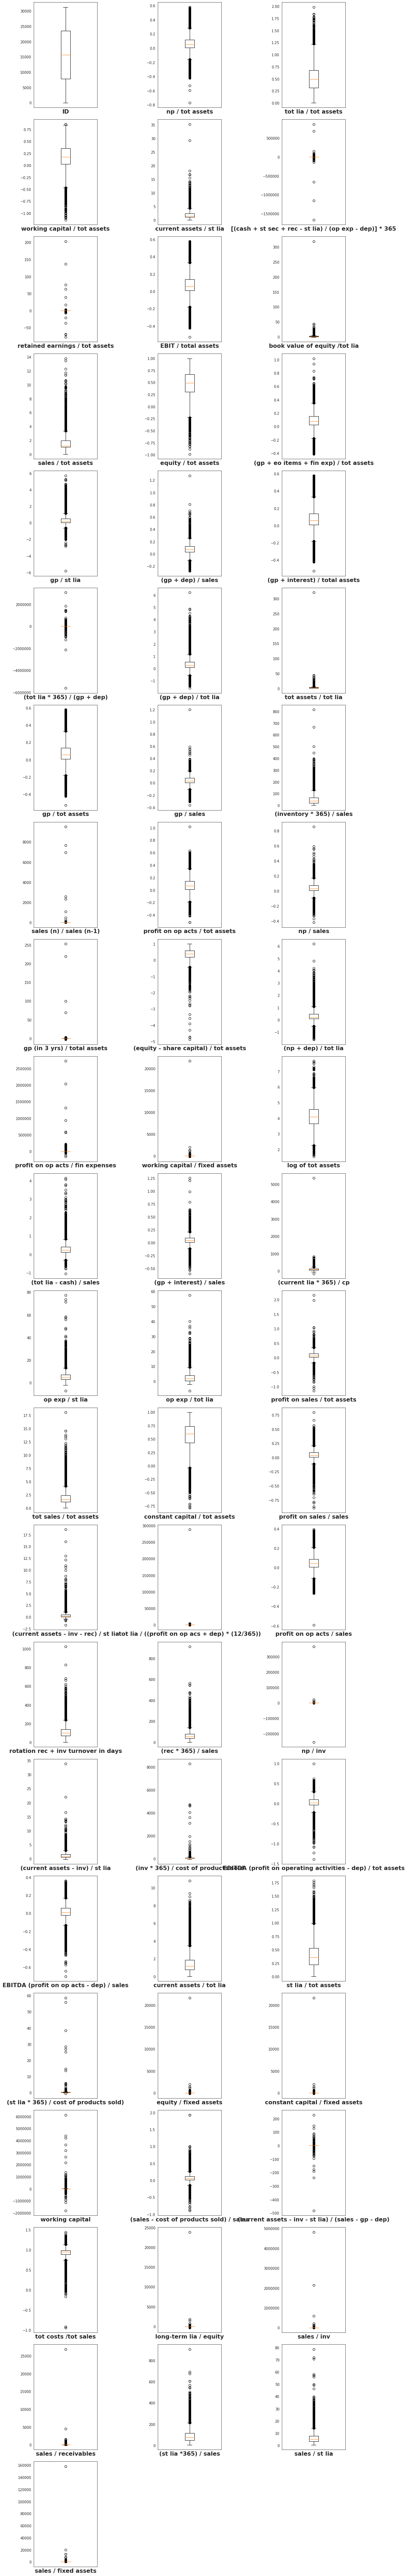

In [0]:
sns.set_style("white")
fig = plt.figure(figsize=(15, 100))
i=1
for column in df_n18.columns[:-1]:
    plt.subplot(22, 3, i);
    plt.boxplot(x=df_n18[column],data=df_n18);
    plt.xlabel(f'{column}', fontsize=16).set_weight('bold');
    plt.xticks([], [])
    i=i+1
    
plt.tight_layout()
plt.show();

In [0]:
df_n21=df_n18.copy()

In [0]:
 aa=df_n21[(df_n21['sales / inv'] >20000)]


In [0]:
 bb=df_n21[(df_n21['np / inv'] >800) | (df_n21['np / inv'] < -200)]


In [0]:
 cc=df_n21[(df_n21['profit on op acts / fin expenses'] <-75000)]


In [0]:
dd=df_n21[(df_n21['sales (n) / sales (n-1)'] >40)]


In [0]:
ee=df_n21[(df_n21['retained earnings / tot assets'] >10) | (df_n21['retained earnings / tot assets'] < -10)]


In [0]:
ff=df_n21[(df_n21['[(cash + st sec + rec - st lia) / (op exp - dep)] * 365'] >75000) | (df_n21['[(cash + st sec + rec - st lia) / (op exp - dep)] * 365'] < -75000)]


In [0]:
gg=df_n21[df_n21['long-term lia / equity'] >500]


In [0]:
hh=df_n21[(df_n21['working capital'] <-1000000) | (df_n21['working capital'] >2000000)]


In [0]:
ii=df_n21[df_n21['sales / fixed assets'] >6000]


In [0]:
jj=df_n21[df_n21['constant capital / fixed assets'] >1000]


In [0]:
kk=df_n21[df_n21['equity / fixed assets'] >1000]


In [0]:
ll=df_n21[df_n21['(st lia * 365) / cost of products sold)'] >10]


In [0]:
mm=df_n21[df_n21['(inv * 365) / cost of products sold'] >6000]


In [0]:
 nn=df_n21[(df_n21['profit on op acts / tot assets'] >0.8) | (df_n21['profit on op acts / tot assets'] < -2.5)]


In [0]:
 oo=df_n21[(df_n21['tot lia / ((profit on op acs + dep) * (12/365))'] >1000) | (df_n21['tot lia / ((profit on op acs + dep) * (12/365))'] < -500)]


In [0]:
 pp=df_n21[df_n21['(current assets - inv - rec) / st lia'] >15]


In [0]:
 qq=df_n21[df_n21['working capital / fixed assets'] >1000]


In [0]:
 rr=df_n21[df_n21['profit on op acts / fin expenses'] >500000]


In [0]:
 ss=df_n21[df_n21['gp (in 3 yrs) / total assets'] >50]

In [0]:
tt=df_n21[(df_n21['(tot lia * 365) / (gp + dep)'] <-2000000) | (df_n21['(tot lia * 365) / (gp + dep)'] >2000000)]


In [0]:
uu=df_n21[df_n21['sales / receivables'] >3000]

In [0]:
vv=df_n21[df_n21['(current lia * 365) / cp'] >4000]

In [0]:
ww=df_n21[df_n21['gp / sales'] >1]

In [0]:
xx=df_n21[df_n21['tot assets / tot lia'] >100]

In [0]:
yy=df_n21[df_n21['gp / st lia'] <-4]

In [0]:
zz=df_n21[df_n21['book value of equity /tot lia'] >100]

In [0]:
df_n22=pd.concat([aa,bb,cc,dd,ee,ff,gg,hh,ii,jj,kk,ll,mm,nn,oo,pp,qq,
                    rr,ss,tt,uu,vv,ww,xx,yy,zz])

In [0]:
df_n23=df_n21.drop(df_n22.index)

In [0]:
df_n21.shape

(24359, 65)

In [0]:
df_n23.shape

(24243, 65)

In [0]:
df_n23=df_n23.drop(["ID"],axis=1)

In [0]:
df_n23.head()

np / tot assets  tot lia / tot assets  working capital / tot assets  \
0         0.135370               0.45185                       0.31162   
1         0.005861               0.39858                       0.19768   
2         0.110600               0.16117                       0.47894   
3         0.063911               1.40730                      -0.29595   
4         0.131680               0.66031                       0.44121   

   current assets / st lia  \
0                   2.0469   
1                   1.9390   
2                   7.5711   
3                   0.5291   
4                   2.7098   

   [(cash + st sec + rec - st lia) / (op exp - dep)] * 365  \
0                                            10.2340         
1                                             9.5771         
2                                           263.9000         
3                                           -46.2870         
4                                           -23.5960         

   retained earnings / tot assets  EBIT / total assets  \
0                         0.16768             0.167630   
1                         0.00000             0.007237   
2                         0.00000             0.138360   
3                        -0.71420             0.079071   
4                        -0.20007             0.131910   

   book value of equity /tot lia  sales / tot assets  equity / tot assets  \
0                        1.21310             2.25540              0.54815   
1                        1.50890             0.97880              0.60142   
2                        5.20450             0.68447              0.83883   
3                       -0.33076             0.98490             -0.46548   
4                        0.51445             2.13570              0.33969   

   (gp + eo items + fin exp) / tot assets  gp / st lia  (gp + dep) / sales  \
0                                0.183310      0.56316            0.089220   
1                                0.029484      0.03438            0.036362   
2                                0.138830      1.89830            0.236220   
3                                0.079071      0.12581            0.030274   
4                                0.186110      0.51117            0.167100   

   (gp + interest) / total assets  (tot lia * 365) / (gp + dep)  \
0                        0.167630                        819.60   
1                        0.007237                       4087.60   
2                        0.138360                        363.85   
3                        0.079071                       5433.40   
4                        0.131910                        675.35   

   (gp + dep) / tot lia  tot assets / tot lia  gp / tot assets  gp / sales  \
0              0.445340               2.21310         0.167630    0.074325   
1              0.089295               2.50890         0.007237    0.007394   
2              1.003200               6.20450         0.138360    0.202140   
3              0.067177               0.71058         0.079071    0.025321   
4              0.540460               1.51440         0.131910    0.061763   

   (inventory * 365) / sales  sales (n) / sales (n-1)  \
0                     40.156                  1.04790   
1                     58.670                  0.97850   
2                     38.625                  1.83520   
3                     12.470                  0.44909   
4                     80.288                  1.06000   

   profit on op acts / tot assets  np / sales  gp (in 3 yrs) / total assets  \
0                        0.181150    0.060019                      0.167630   
1                        0.006018    0.005988                      0.057817   
2                        0.116690    0.161590                      0.235380   
3                        0.137870    0.020466                     -0.689290   
4                        0.182720    0.061656                      0.208580   

   (equity - share capital) / tot

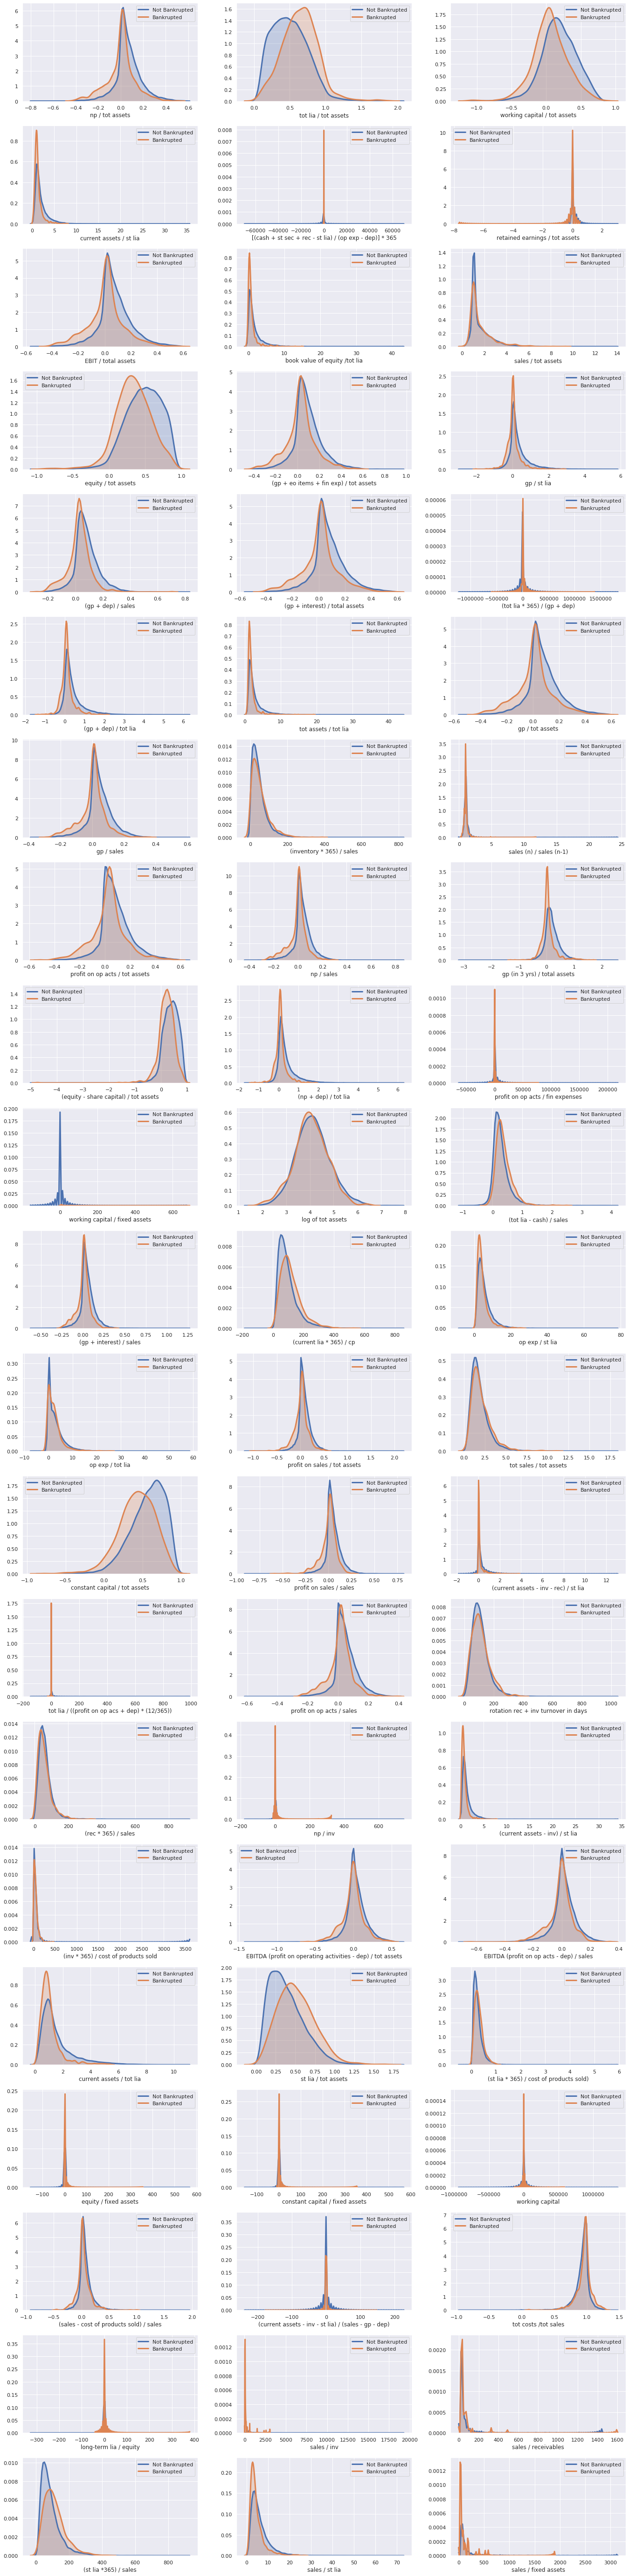

In [0]:
sns.set()
fig = plt.figure(figsize=(19, 80))
i=1
for column in df_n23.columns[:-1]:
    plt.subplot(22, 3, i)
    sns.distplot(df_n23.loc[df_n23.target== 0, column], hist = False, kde = True, 
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label= 'Not Bankrupted')
    sns.distplot(df_n23.loc[df_n23.target== 1, column], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label= 'Bankrupted')
    i=i+1
plt.tight_layout()
plt.show()

In [0]:
df_n23.describe()

np / tot assets  tot lia / tot assets  working capital / tot assets  \
count     24243.000000          24243.000000                  24243.000000   
mean          0.062771              0.506548                      0.181486   
std           0.114904              0.247175                      0.248412   
min          -0.769920              0.022870                     -1.139400   
25%           0.007098              0.312640                      0.024431   
50%           0.049424              0.489120                      0.176920   
75%           0.118480              0.674890                      0.352605   
max           0.577950              1.984300                      0.859080   

       current assets / st lia  \
count             24243.000000   
mean                  1.952804   
std                   1.440312   
min                   0.037783   
25%                   1.053700   
50%                   1.493600   
75%                   2.376300   
max                  35.250000   

       [(cash + st sec + rec - st lia) / (op exp - dep)] * 365  \
count                                       24243.000000         
mean                                          -12.616152         
std                                          2035.361089         
min                                        -69473.000000         
25%                                           -47.685500         
50%                                            -6.823700         
75%                                            34.696000         
max                                         69881.000000         

       retained earnings / tot assets  EBIT / total assets  \
count                    24243.000000         24243.000000   
mean                         0.048323             0.075478   
std                          0.248204             0.126059   
min                         -7.664900            -0.527490   
25%                          0.000000             0.010032   
50%                          0.000000             0.059426   
75%                          0.111095             0.138270   
max                          3.037800             0.578140   

       book value of equity /tot lia  sales / tot assets  equity / tot assets  \
count                   24243.000000        24243.000000         24243.000000   
mean                        1.678485            1.627924             0.473851   
std                         2.042392            1.002579             0.244966   
min                        -0.522340            0.045829            -0.984260   
25%                         0.457050            1.028250             0.306400   
50%                         0.999590            1.181300             0.488020   
75%                         2.116800            1.968200             0.663740   
max                        42.725000           13.762000             0.977130   

       (gp + eo items + fin exp) / tot assets   gp / st lia  \
count                            24243.000000  24243.000000   
mean                                 0.091406      0.313574   
std                                  0.127058      0.563526   
min                                 -0.412390     -2.839300   
25%                                  0.021568      0.025127   
50%                                  0.075342      0.163560   
75%                                  0.154055      0.473530   
max                                  0.933400      5.705600   

       (gp + dep) / sales  (gp + interest) / total assets  \
count        24243.000000                    24243.000000   
mean             0.078018                        0.075478   
std              0.086321                        0.126059   
min             -0.283050                       -0.527490   
25%              0.028422                        0.010032   
50%              0.067313                        0.059426   
75%              0.120980                        0.138270   
max              0.804110                        0.578140

##Comparing features with target

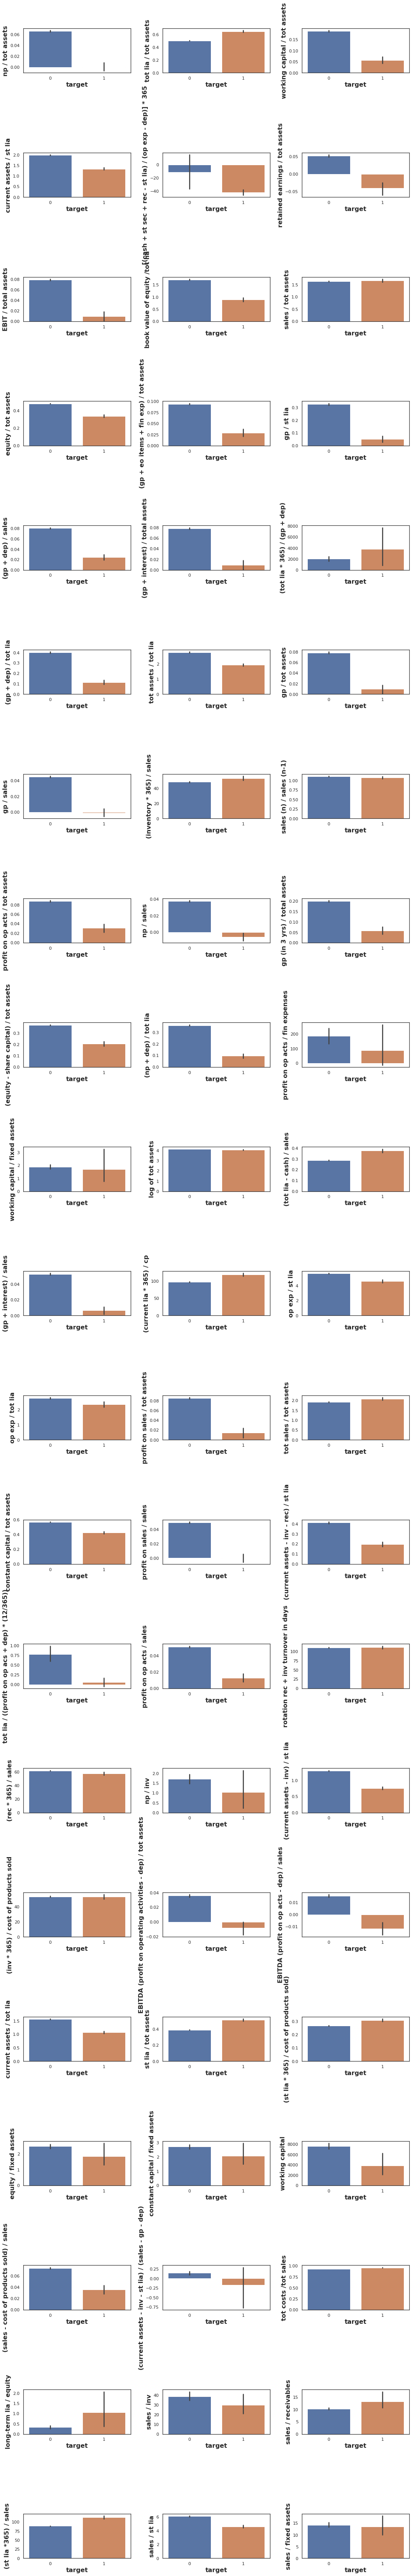

In [0]:
sns.set_style("white")
fig = plt.figure(figsize=(15, 100))
i=1
for column in df_n23.columns[:-1]:
    plt.subplot(23, 3, i)
    sns.barplot(y=df_n23[column], x='target', data=df_n23)

    
    plt.ylabel(f'{column}', fontsize=16).set_weight('bold')
    plt.xlabel("target",fontsize=16).set_weight('bold')

    i=i+1
plt.tight_layout()
plt.show()

###We can see that bankruptcy cases are high when


*   Liabilities are increasing per given Assets,Cost Prices and Sales
*   If Inventory/Year(that a manufacturing business may have include: raw materials, such as wood, to make a shelf. work-in-process inventory, such as an unfinished cake in a food manufacturing business. finished goods inventory, such as a bed you've finished making) is increasing than sales.
*   If Sales are increasing per given Assets,Receivables,
*   If Total Costs are increasing than Total Sales







In [0]:
# sns.catplot(x="total", y="embark_town",
#             hue="sex", col="class",
#             data=titanic[titanic.embark_town.notnull()],
#             orient="h", height=5, aspect=1, palette="tab10",
#             kind="violin", dodge=True, cut=0, bw=.2)

###Correlation Plot

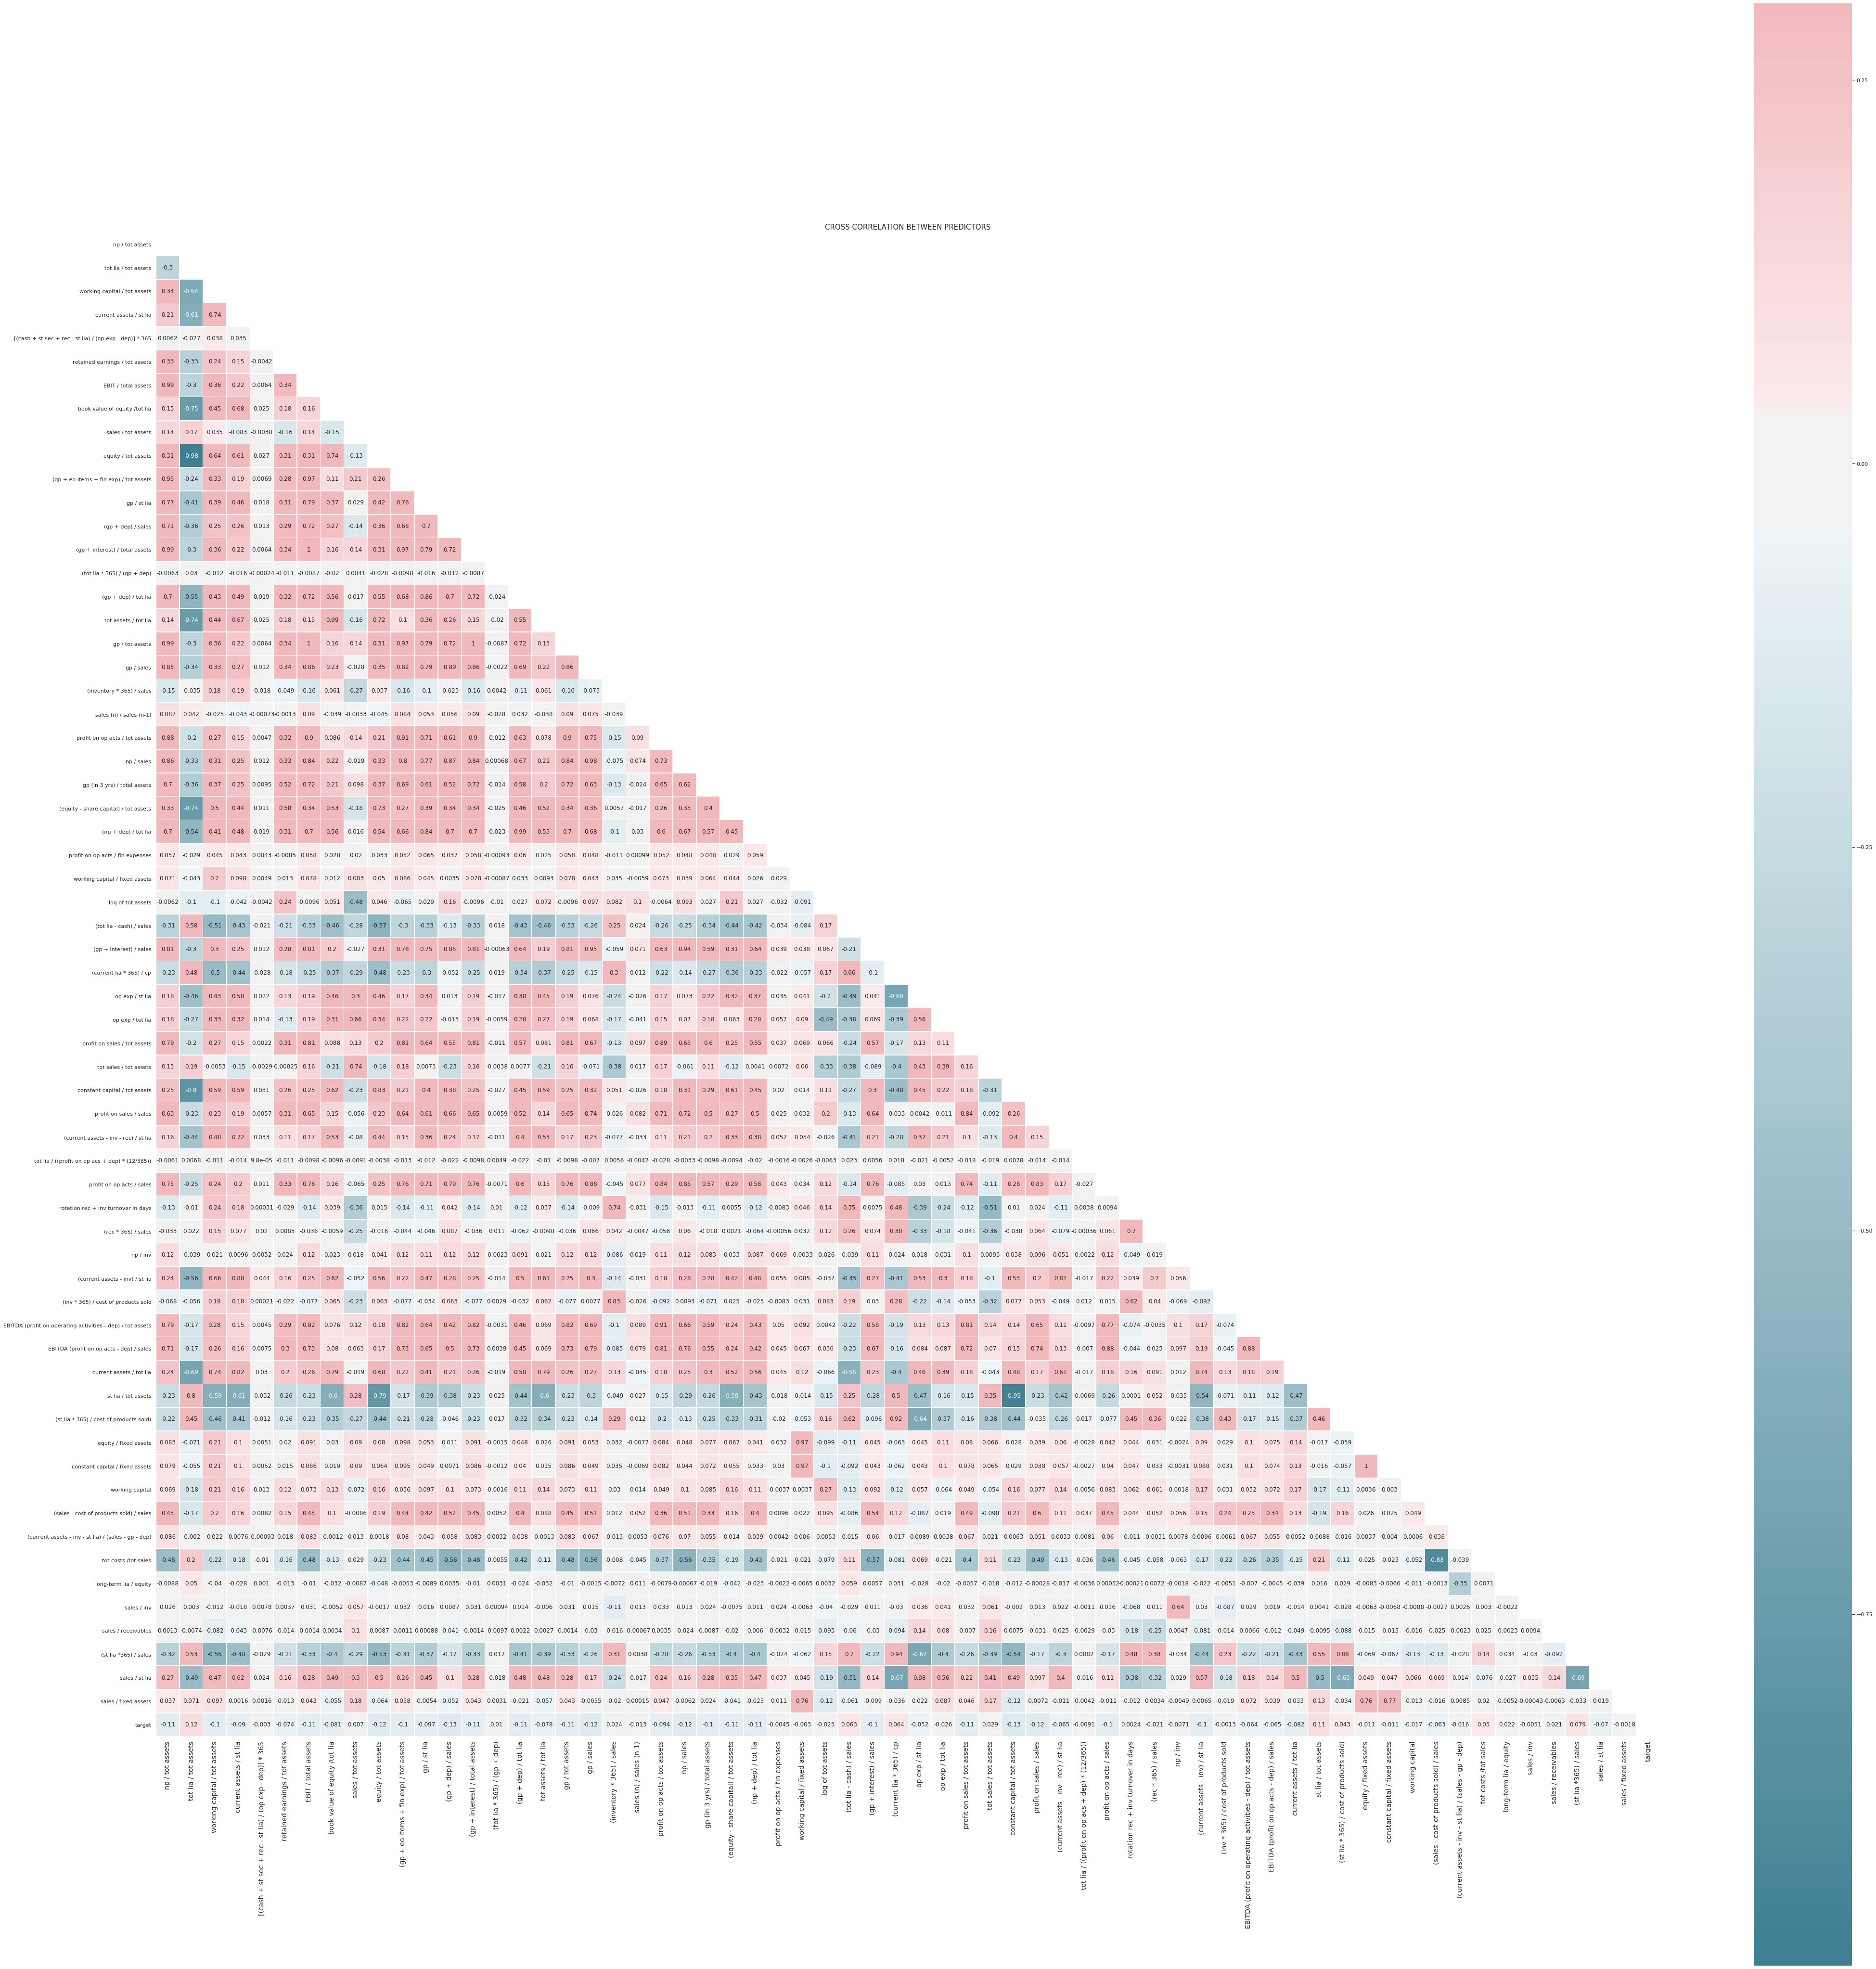

In [0]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_n23.iloc[:, :].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(70, 150))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True);
plt.title("CROSS CORRELATION BETWEEN PREDICTORS", fontsize=15)
plt.xticks(rotation= 90,fontsize=14)
plt.show()

####Checking VIF

In [0]:
from patsy import dmatrices

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(df_n23.values,i) 
                   for i in range(df_n23.shape[1])]
vif["featues"]=df_n23.columns
vif.round(1) 

VIF Factor                                            featues
0   2.494000e+02                                    np / tot assets
1   2.169000e+02                               tot lia / tot assets
2   1.260000e+01                       working capital / tot assets
3   5.300000e+01                            current assets / st lia
4   1.000000e+00  [(cash + st sec + rec - st lia) / (op exp - de...
5   2.200000e+00                     retained earnings / tot assets
6            inf                                EBIT / total assets
7   1.031000e+02                      book value of equity /tot lia
8   1.820000e+01                                 sales / tot assets
9   2.024000e+02                                equity / tot assets
10  3.450000e+01             (gp + eo items + fin exp) / tot assets
11  1.450000e+01                                        gp / st lia
12  6.423000e+02                                 (gp + dep) / sales
13           inf                     (gp + interest) / total assets
14  1.000000e+00                       (tot lia * 365) / (gp + dep)
15  3.198000e+02                               (gp + dep) / tot lia
16  1.529000e+02                               tot assets / tot lia
17           inf                                    gp / tot assets
18  5.847000e+02                                         gp / sales
19  6.729045e+08                          (inventory * 365) / sales
20  5.200000e+00                            sales (n) / sales (n-1)
21  9.270000e+01                     profit on op acts / tot assets
22  1.325000e+02                                         np / sales
23  4.000000e+00                       gp (in 3 yrs) / total assets
24  7.900000e+00              (equity - share capital) / tot assets
25  2.897000e+02                               (np + dep) / tot lia
26  1.000000e+00                   profit on op acts / fin expenses
27  1.950000e+01                     working capital / fixed assets
28  5.630000e+01                                  log of tot assets
29  1.310000e+01                           (tot lia - cash) / sales
30  2.770000e+01                            (gp + interest) / sales
31  1.196000e+02                           (current lia * 365) / cp
32  3.718000e+02                                    op exp / st lia
33  7.500000e+00                                   op exp / tot lia
34  2.600000e+01                       profit on sales / tot assets
35  2.970000e+01                             tot sales / tot assets
36  1.578000e+02                      constant capital / tot assets
37  1.910000e+01                            profit on sales / sales
38  8.000000e+00              (current assets - inv - rec) / st lia
39  1.000000e+00    tot lia / ((profit on op acs + dep) * (12/365))
40  4.170000e+02                          profit on op acts / sales
41  2.555437e+09                rotation rec + inv turnover in days
42  8.837086e+08                                (rec * 365) / sales
43  1.800000e+00                                           np / inv
44  3.790000e+01                    (current assets - inv) / st lia
45  2.050000e+01                (inv * 365) / cost of products sold
46  2.960000e+01  EBITDA (profit on operating activities - dep) ...
47  3.561000e+02           EBITDA (profit on op acts - dep) / sales
48  3.450000e+01                           current assets / tot lia
49  1.230000e+02                                st lia / tot assets
50  5.910000e+01            (st lia * 365) / cost of products sold)
51  1.982000e+02                              equity / fixed assets
52  2.104000e+02                    constant capital / fixed assets
53  1.200000e+00                                    working capital
54  1.950000e+01            (sales - cost of products sold) / sales
55  1.200000e+00  (current assets - inv - st lia) / (sales - gp ...
56  2.947000e+02                               tot costs /tot sales
57  1.200000e+00                             long-term lia / e

##Model Building using Logistic Regression

In [0]:
x=df_n23.drop(['target'],axis=1)
y=df_n23['target']


In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 


In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16970, 63)
(7273, 63)
(16970,)
(7273,)


In [0]:
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train) 
predictions_normal = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions_normal))  



              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6977
           1       0.00      0.00      0.00       296

    accuracy                           0.96      7273
   macro avg       0.48      0.50      0.49      7273
weighted avg       0.92      0.96      0.94      7273



##Model Building using SMOTE

In [0]:

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 


In [0]:
X_smote, y_smote = sm.fit_sample(x, y)

In [0]:
X_smote, y_smote = sm.fit_sample(x, y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_smote, y_smote, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_train2.shape)
print(y_train2.shape)


(16970, 63)
(16970,)
(32531, 63)
(32531,)


In [0]:
print(sum(y_train == 1))
print(sum(y_train == 0))

print(sum(y_train2 == 1))
print(sum(y_train2 == 0))



710
16260
16346
16185


In [0]:
lr1 = LogisticRegression() 
lr1.fit(X_train2, y_train2) 
predictions1 = lr1.predict(X_test2) 

In [0]:
print(classification_report(y_test2, predictions1)) 


              precision    recall  f1-score   support

           0       0.64      0.57      0.61      7052
           1       0.61      0.68      0.64      6891

    accuracy                           0.62     13943
   macro avg       0.63      0.62      0.62     13943
weighted avg       0.63      0.62      0.62     13943



##Model Using Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train2, y_train2)
predictions_rf = rnd_clf.predict(X_test2) 

In [0]:
print(classification_report(y_test2, predictions_rf)) 


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7052
           1       0.98      0.99      0.98      6891

    accuracy                           0.98     13943
   macro avg       0.98      0.98      0.98     13943
weighted avg       0.98      0.98      0.98     13943



##Feature Importance using Permutation Imporatance





In [0]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier
# from sklearn.inspection import permutation_importance

     |████████████████████████████████| 112kB 10.2MB/s 


Using TensorFlow backend.


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train2, y_train2)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test2, y_test2)))

Accuracy on test data: 0.98


In [0]:
from mlxtend.evaluate import feature_importance_permutation

from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=10000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_smote, y_smote, test_size=0.3, random_state=1, stratify=y_smote)

In [0]:
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(X_train2, y_train2)
perm = PermutationImportance(my_model, random_state=1).fit(X_test2, y_test2)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


###Feature Importance Using Random Forest Classifier

In [0]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train2, y_train2)

importances = rnd_clf.feature_importances_



In [0]:
allvarlist = list()
for col in df_n23.columns:
  allvarlist.append(col)

In [0]:
del allvarlist[-1]

In [0]:
len(rnd_clf.feature_importances_)

63

In [0]:
df_rf=pd.DataFrame({'allvarlist':allvarlist,'importances':rnd_clf.feature_importances_})
df_rf


allvarlist  importances
0                                     np / tot assets     0.009649
1                                tot lia / tot assets     0.013905
2                        working capital / tot assets     0.008179
3                             current assets / st lia     0.008652
4   [(cash + st sec + rec - st lia) / (op exp - de...     0.030697
5                      retained earnings / tot assets     0.056629
6                                 EBIT / total assets     0.008091
7                       book value of equity /tot lia     0.009776
8                                  sales / tot assets     0.017930
9                                 equity / tot assets     0.014941
10             (gp + eo items + fin exp) / tot assets     0.008886
11                                        gp / st lia     0.013615
12                                 (gp + dep) / sales     0.016020
13                     (gp + interest) / total assets     0.007747
14                       (tot lia * 365) / (gp + dep)     0.012344
15                               (gp + dep) / tot lia     0.022095
16                               tot assets / tot lia     0.010058
17                                    gp / tot assets     0.008281
18                                         gp / sales     0.009947
19                          (inventory * 365) / sales     0.010094
20                            sales (n) / sales (n-1)     0.009470
21                     profit on op acts / tot assets     0.012362
22                                         np / sales     0.011424
23                       gp (in 3 yrs) / total assets     0.050993
24              (equity - share capital) / tot assets     0.018723
25                               (np + dep) / tot lia     0.024863
26                   profit on op acts / fin expenses     0.078064
27                     working capital / fixed assets     0.008904
28                                  log of tot assets     0.016683
29                           (tot lia - cash) / sales     0.010727
30                            (gp + interest) / sales     0.009966
31                           (current lia * 365) / cp     0.008221
32                                    op exp / st lia     0.011411
33                                   op exp / tot lia     0.033465
34                       profit on sales / tot assets     0.015308
35                             tot sales / tot assets     0.012265
36                      constant capital / tot assets     0.032991
37                            profit on sales / sales     0.022464
38              (current assets - inv - rec) / st lia     0.009535
39    tot lia / ((profit on op acs + dep) * (12/365))     0.014373
40                          profit on op acts / sales     0.014630
41                rotation rec + inv turnover in days     0.007420
42                                (rec * 365) / sales     0.010305
43                                           np / inv     0.009857
44                    (current assets - inv) / st lia     0.025190
45                (inv * 365) / cost of products sold     0.009845
46  EBITDA (profit on operating activities - dep) ...     0.008637
47           EBITDA (profit on op acts - dep) / sales     0.008505
48                           current assets / tot lia     0.008333
49                                st lia / tot assets     0.022716
50            (st lia * 365) / cost of products sold)     0.007537
51                              equity / fixed assets     0.007946
52                    constant capital / fixed assets     0.008902
53                                    working capital     0.014858
54            (sales - cost of products sold) / sales     0.012767
55  (current assets - inv - st lia) / (sales - gp ...     0.008987
56                               tot costs /tot sales     0.022954
57                             long-term lia / equity     0.022603
58                                        sales / inv     0.011464
59                     

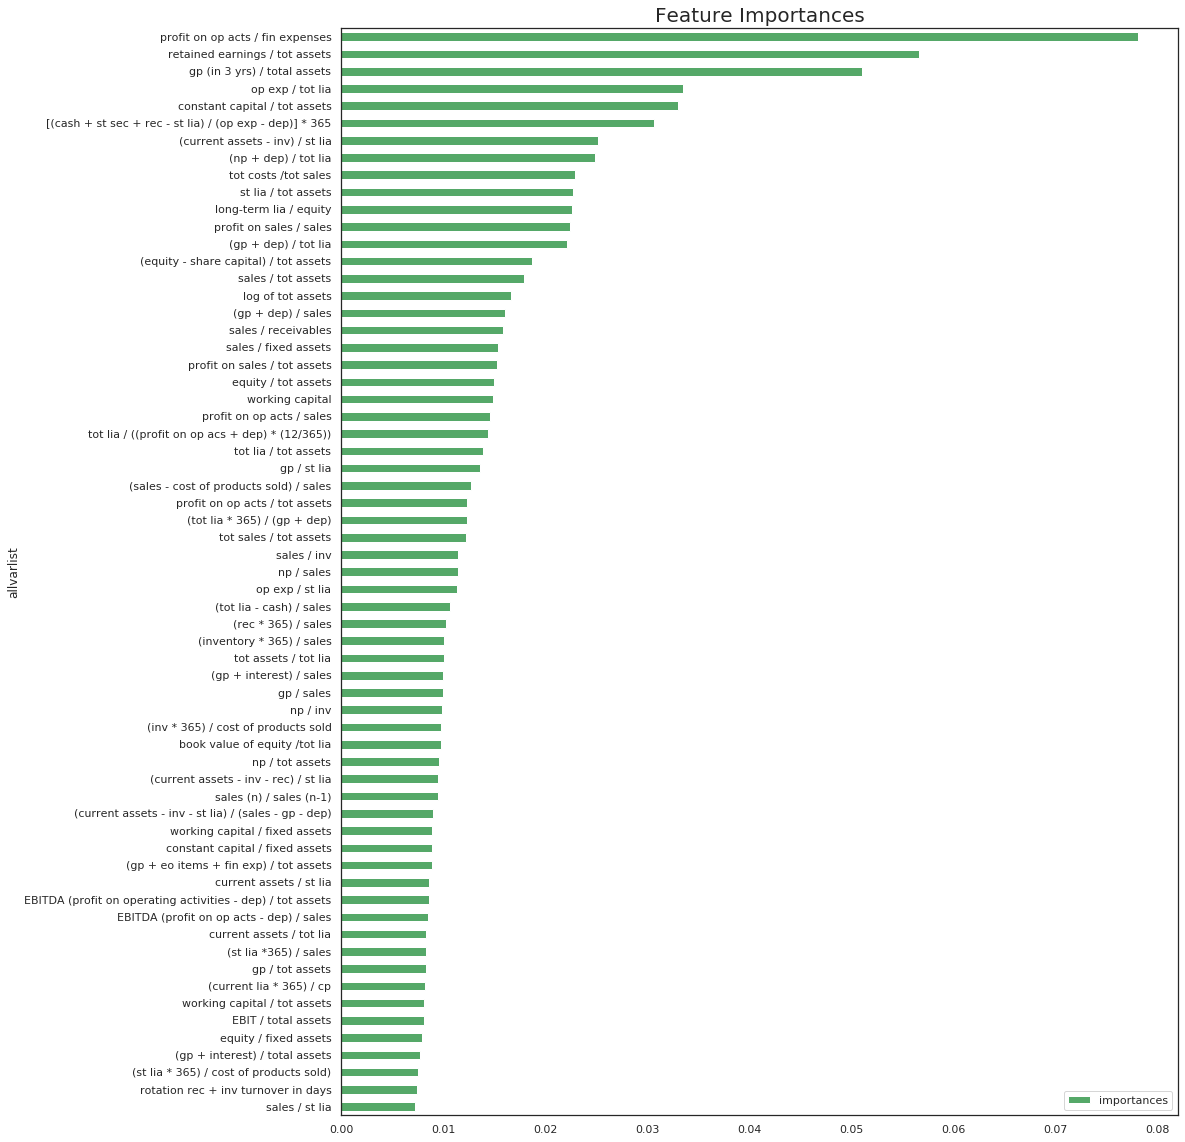

In [0]:
# plt.figure(figsize=(14,20))
plt.rcParams['figure.figsize'] = [15, 20]

df_rf.sort_values('importances',inplace=True)
df_rf.plot(kind='barh',y='importances',x='allvarlist',color='g')
plt.title('Feature Importances', fontsize=20)
plt.show()

##Top 10 Features

In [0]:
names= [ele[1] for ele in sorted(zip(importances,allvarlist), reverse= True)[:10]]
values= [ele[0] for ele in sorted(zip(importances,allvarlist), reverse= True)[:10]]

In [0]:
top_ten= dict(sorted(zip(importances,allvarlist), reverse= True)[:10])

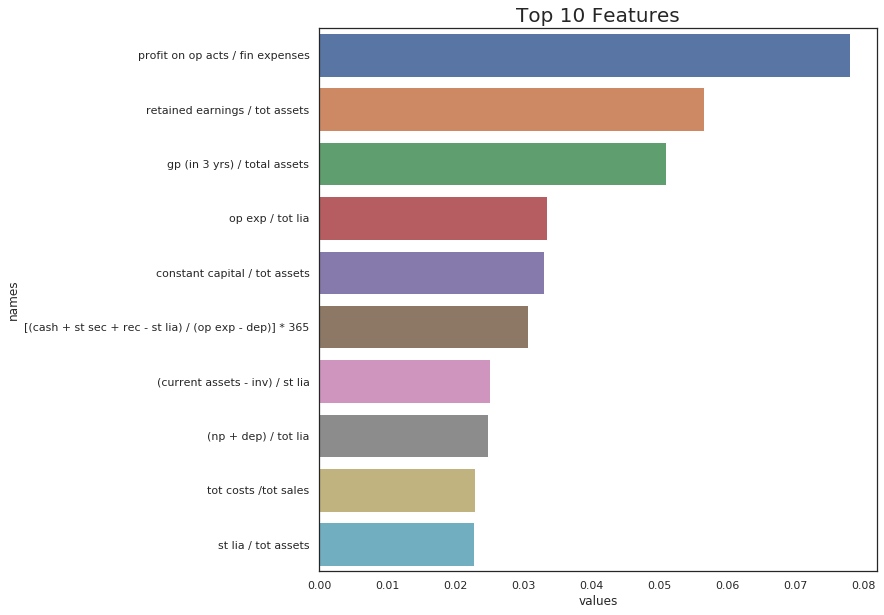

In [0]:
fig,ax= plt.subplots(figsize=(10,10))
top_ten= pd.DataFrame({'names' : names, 'values' : values})
sns.barplot(x= 'values', y = 'names', data= top_ten)
plt.title('Top 10 Features', fontsize=20)
plt.show()